In [282]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [283]:
#To display all columns and all rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [284]:
#Reading the datasets
app_data=pd.read_csv('application_data.csv')
prev_data=pd.read_csv('previous_application.csv')

In [285]:
#Displaying first five rows in Application data
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [286]:
#Checking number of rows and columns in application_data.csv
print(app_data.shape)

(307511, 122)


## Data Cleaning on application_dataset

In [288]:
#Calculating percentage of missing values in application_data
round((app_data.isnull().sum() * 100 / len(app_data)).sort_values(ascending=False), 2)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_AVG        69.43
NONLIVINGAPARTMENTS_MEDI       69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
LIVINGAPARTMENTS_MEDI          68.35
FLOORSMIN_AVG                  67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_MEDI                 67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_MODE               66.50
YEARS_BUILD_AVG                66.50
OWN_CAR_AGE                    65.99
LANDAREA_MEDI                  59.38
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MODE             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MEDI             55.18
E

In [289]:
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [290]:
# Listing columns having more than 30% missing values
missing_values_30 = round((app_data.isnull().sum() * 100 / len(app_data)).sort_values(ascending=False), 2)
nullvalues_30 = missing_values_30[missing_values_30 >= 30]
print(nullvalues_30)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_AVG        69.43
NONLIVINGAPARTMENTS_MEDI       69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
LIVINGAPARTMENTS_MEDI          68.35
FLOORSMIN_AVG                  67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_MEDI                 67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_MODE               66.50
YEARS_BUILD_AVG                66.50
OWN_CAR_AGE                    65.99
LANDAREA_MEDI                  59.38
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MODE             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MEDI             55.18
E

In [291]:
#Dropping the columns which have missing values more than 30%
app_data = app_data.drop(columns=nullvalues_30.index)

In [292]:
#Let's check the number of rows and columns after removing the columns
app_data.shape

(307511, 72)

In [293]:
round((app_data.isnull().sum() * 100 / len(app_data)).sort_values(ascending=False), 2)

EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_18               0.00
FLAG_DOCUMENT_5                0.00
FLAG_DOCUMENT_21               0.00
FLAG_DOCUMENT_20               0.00
FLAG_DOCUMENT_19               0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_4                0.00
FLAG_DOCUMENT_6                0.00
FLAG_DOCUMENT_17               0.00
FLAG_DOCUMENT_7             

In [294]:
# Listing columns having more than or equal to 10% missing values in order to fix them
missing_values_10 = round((app_data.isnull().sum() * 100 / len(app_data)).sort_values(ascending=False), 2)
nullvalues_10 = missing_values_10[missing_values_10 >= 10]
print(nullvalues_10)

EXT_SOURCE_3                 19.83
AMT_REQ_CREDIT_BUREAU_YEAR   13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
dtype: float64


In [295]:
app_data.EXT_SOURCE_3.head()

0   0.14
1    NaN
2   0.73
3    NaN
4    NaN
Name: EXT_SOURCE_3, dtype: float64

In [296]:
#Checking null values in EXT_SOURCE_3 column
app_data["EXT_SOURCE_3"].isnull().sum()

60965

In [297]:
#Checking null values in EXT_SOURCE_2 column
app_data["EXT_SOURCE_2"].isnull().sum()

660

In [298]:
#EXT_SOURCE_2 & EXT_SOURCE_3 have many null values and as these values are from extneral sources so we can't fill them.Therefore, it's better to drop these columns.
app_data.drop(columns = ['EXT_SOURCE_2','EXT_SOURCE_3'], inplace = True)

In [299]:
#Checking the rows and columns in data after dropping
app_data.shape

(307511, 70)

## Imputing the missing values in application_dataset

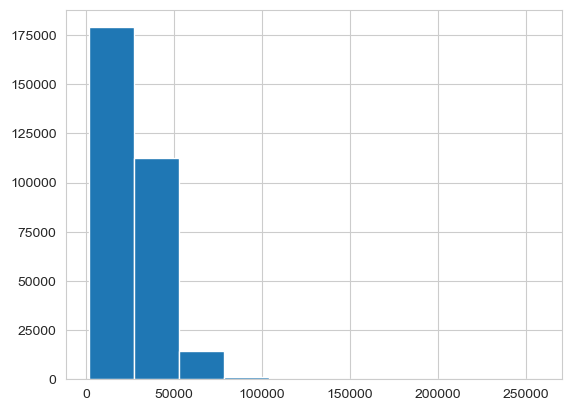

In [301]:
#Plotting the histogram for AMT_ANNUITY
plt.hist(app_data["AMT_ANNUITY"])
plt.show()

In [302]:
#Checking null values in AMT_ANNUITY
app_data["AMT_ANNUITY"].isnull().sum()

12

In [303]:
#Checking median in AMT_ANNUITY
app_data["AMT_ANNUITY"].median()

24903.0

In [304]:
#Replacing null values in AMT_ANNUITY with median value
app_data["AMT_ANNUITY"]=app_data["AMT_ANNUITY"].fillna(app_data["AMT_ANNUITY"].median())

In [305]:
#Rechecking null values in AMT_ANNUITY
app_data["AMT_ANNUITY"].isnull().sum()

0

In [306]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [307]:
#Checking values in AMT_GOODS_PRICE
app_data["AMT_GOODS_PRICE"].describe()

count    307233.00
mean     538396.21
std      369446.46
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

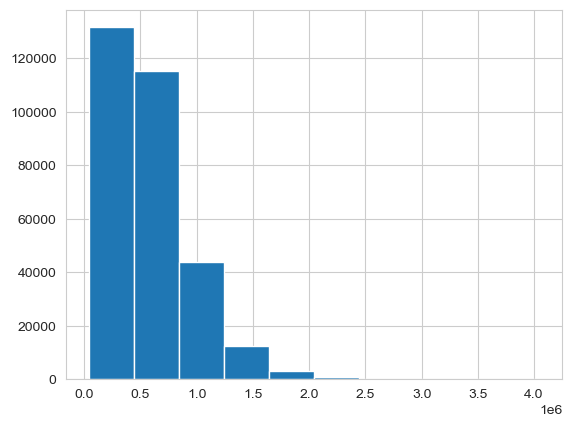

In [308]:
#Plotting histogram for AMT_GOODS_PRICE
plt.hist(app_data["AMT_GOODS_PRICE"])
plt.show()

In [309]:
#let's check the null values in AMT_GOODS_PRICE
app_data["AMT_GOODS_PRICE"].isnull().sum()

278

In [310]:
#let's check the min value in AMT_GOODS_PRICE
app_data["AMT_GOODS_PRICE"].min()

40500.0

In [311]:
#Checking the max value in AMT_GOODS_PRICE
app_data["AMT_GOODS_PRICE"].max()

4050000.0

In [312]:
#let's check the median value in AMT_GOODS_PRICE
app_data["AMT_GOODS_PRICE"].median()

450000.0

In [313]:
#There is huge difference between min and max value so imputing missing values with median value would be a better approach
app_data["AMT_GOODS_PRICE"]=app_data["AMT_GOODS_PRICE"].fillna(app_data["AMT_GOODS_PRICE"].mean())

In [314]:
#let's recheck the null values in AMT_GOODS_PRICE
app_data["AMT_GOODS_PRICE"].isnull().sum()

0

In [315]:
#let's check the null values in NAME_TYPE_SUITE
app_data["NAME_TYPE_SUITE"].isnull().sum()

1292

In [316]:
#Checking NAME_TYPE_SUITE column
app_data["NAME_TYPE_SUITE"].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [317]:
#Checking each value count in NAME_TYPE_SUITE
app_data["NAME_TYPE_SUITE"].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

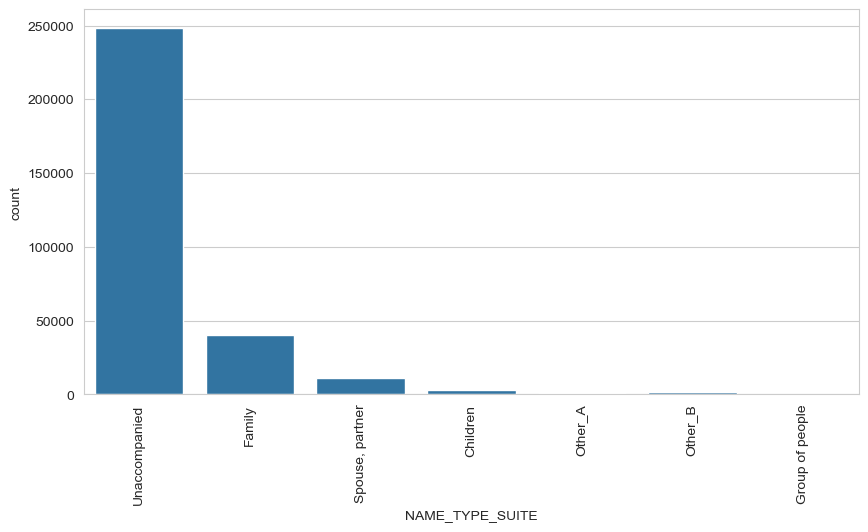

In [318]:
#Plotting a count plot for NAME_TYPE_SUITE
plt.figure(figsize = (10,5))
sns.countplot(data = app_data, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

In [319]:
#Replacing all null values with Unaccompanied
app_data["NAME_TYPE_SUITE"] = app_data["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [320]:
#let's recheck the null values in NAME_TYPE_SUITE
app_data["NAME_TYPE_SUITE"].isnull().sum()

0

In [321]:
#Checking values in CNT_FAM_MEMBERS
app_data["CNT_FAM_MEMBERS"].describe()

count   307509.00
mean         2.15
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

In [322]:
#Checking count value in CNT_FAM_MEMBERS
app_data["CNT_FAM_MEMBERS"].value_counts(normalize=True).sort_values(ascending=False)*100

CNT_FAM_MEMBERS
2.00    51.50
1.00    22.06
3.00    17.11
4.00     8.03
5.00     1.13
6.00     0.13
7.00     0.03
8.00     0.01
9.00     0.00
10.00    0.00
14.00    0.00
12.00    0.00
20.00    0.00
16.00    0.00
13.00    0.00
15.00    0.00
11.00    0.00
Name: proportion, dtype: float64

In [323]:
#Getting percentile values for CNT_FAM_MEMBERS
app_data['CNT_FAM_MEMBERS'].describe(percentiles = [0.75,0.95,0.99,0.9999])

count    307509.00
mean          2.15
std           0.91
min           1.00
50%           2.00
75%           3.00
95%           4.00
99%           5.00
99.99%        8.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64

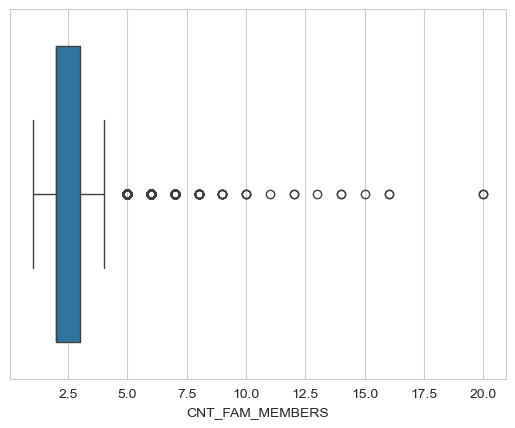

In [324]:
#Box plot for CNT_FAM_MEMBERS
sns.boxplot(data=app_data, x='CNT_FAM_MEMBERS')
plt.show()

In [325]:
#Checking values for AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR
app_data.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,0.01,0.01,0.03,0.27,0.27,1.90
std,0.08,0.11,0.20,0.92,0.79,1.87
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,1.00
75%,0.00,0.00,0.00,0.00,0.00,3.00
max,4.00,9.00,8.00,27.00,261.00,25.00


In [326]:
#Selecting columns which have BUREAU|CNT
selected_cols=app_data.loc[:,app_data.columns.str.contains("BUREAU|CNT")]

In [327]:
#Filling value as 0 in selected_cols and changing their type to int
#app_data.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"]=app_data.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(app_data.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].mean())
app_data[selected_cols.columns]=selected_cols.apply(pd.to_numeric,errors="coerce").fillna(0).astype(int)

In [328]:
#Checking null value in AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR
app_data.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [329]:
#Checking null values in OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE
app_data.loc[:,"OBS_30_CNT_SOCIAL_CIRCLE":"DEF_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [330]:
#Storing all columns in flag_columns that starts with FLAG
flag_columns=[] 
for col in app_data.columns: 
    if col.startswith('FLAG'): 
        flag_columns.append(col)

print(len(flag_columns))

28


In [331]:
#Dropping all FLAG columns
app_data.drop(columns=flag_columns, inplace=True)

In [332]:
#Now checking Rows and columns
app_data.shape

(307511, 42)

In [333]:
#Now checking if all values are correct in categorical columns i.e. columns with object data type
for col in app_data.columns:
    if app_data[col].dtype=="object":
        print(app_data[col].value_counts())
        print("****"*10)

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
****************************************
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
****************************************
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
****************************************
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
****************************************
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lowe

In [334]:
#Now we can clearly see a problem in column: CODE_GENDER, ORGANIZATION_TYPE where NA is inputed as XNA and that would create a problem during analysis
app_data["CODE_GENDER"].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [335]:
#Let's fix data in Colunmn CODE_GENDER
app_data["CODE_GENDER"].replace(to_replace="XNA",value="F",inplace=True)

In [336]:
#Rechecking count of values in CODE_GENDER
app_data["CODE_GENDER"].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [337]:
#Checking count of values in ORGANIZATION_TYPE
app_data["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [338]:
#Now as we can see ORGANIZATION_TYPE has 55374 masked values which we should drop otherwise this would lead to wrong result as it is a huge number
app_data = app_data.drop(app_data[app_data["ORGANIZATION_TYPE"]=="XNA"].index)

In [339]:
#Rechecking count of values in ORGANIZATION_TYPE
app_data["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

## Creating bins for the AMT_INCOME_TOTAL and AMT_CREDIT

In [341]:
#Checking values for AMT_INCOME_TOTAL
app_data["AMT_INCOME_TOTAL"].describe()

count      252137.00
mean       175914.07
std        258851.59
min         25650.00
25%        112500.00
50%        157500.00
75%        211500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

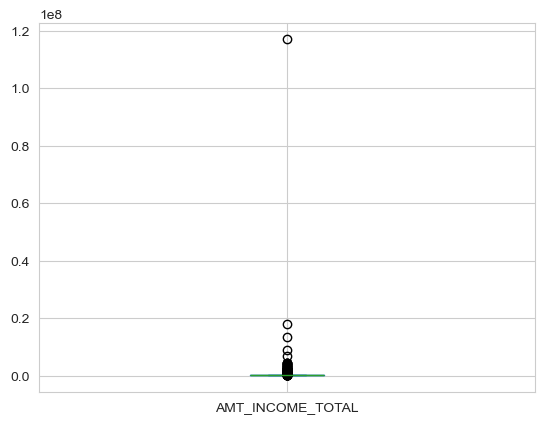

In [342]:
#Box plot for AMT_INCOME_TOTAL
app_data["AMT_INCOME_TOTAL"].plot.box()
plt.show()

In [343]:
#Checking values in AMT_INCOME_TOTAL
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,-1134.00,0,0,0,0,0,1
1,100003,0,Cash loans,F,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,-828.00,0,0,0,0,0,0
2,100004,0,Revolving loans,M,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,-815.00,0,0,0,0,0,0
3,100006,0,Cash loans,F,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,-617.00,0,0,0,0,0,0
4,100007,0,Cash loans,M,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-4311.00,-3458,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,-1106.00,0,0,0,0,0,0


In [344]:
#Dividing "AMT_INCOME_TOTAL" into bins
bins_income = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot_income = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data["AMT_INCOME_RANGE"]=pd.cut(app_data["AMT_INCOME_TOTAL"],bins=bins_income,labels=slot_income)

In [345]:
#Rechecking
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,-1134.00,0,0,0,0,0,1,200000-225000
1,100003,0,Cash loans,F,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,-828.00,0,0,0,0,0,0,250000-275000
2,100004,0,Revolving loans,M,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,-815.00,0,0,0,0,0,0,50000-75000
3,100006,0,Cash loans,F,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,-617.00,0,0,0,0,0,0,125000-150000
4,100007,0,Cash loans,M,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-4311.00,-3458,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,-1106.00,0,0,0,0,0,0,100000-125000


In [346]:
#Checking first 10 values in AMT_INCOME_RANGE
app_data["AMT_INCOME_RANGE"].head(10)

0     200000-225000
1     250000-275000
2       50000-75000
3     125000-150000
4     100000-125000
5      75000,100000
6     150000-175000
7     350000-375000
9     125000-150000
10    100000-125000
Name: AMT_INCOME_RANGE, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [347]:
#Checking values in AMT_CREDIT
app_data["AMT_CREDIT"].describe()

count    252137.00
mean     611398.46
std      406527.20
min       45000.00
25%      277969.50
50%      521280.00
75%      829224.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

In [348]:
#Dividing "AMT_CREDIT" into bins
bins_credit = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]

slots_credit = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data["AMT_CREDIT_RANGE"]=pd.cut(app_data["AMT_CREDIT"],bins=bins_credit,labels=slots_credit)


In [349]:
#Checking first 5 values in AMT_CREDIT_RANGE
app_data["AMT_CREDIT_RANGE"].head()

0       400000-450000
1    900000 and above
2            0-150000
3       300000-350000
4       500000-550000
Name: AMT_CREDIT_RANGE, dtype: category
Categories (17, object): ['0-150000' < '150000-200000' < '200000-250000' < '250000-300000' ... '750000-800000' < '800000-850000' < '850000-900000' < '900000 and above']

## Calculating the Imbalance Ratio

In [351]:
#Checking the count of Non-Defaulters(Target value 0) and Defaulters(Target value 1)
app_data["TARGET"].value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

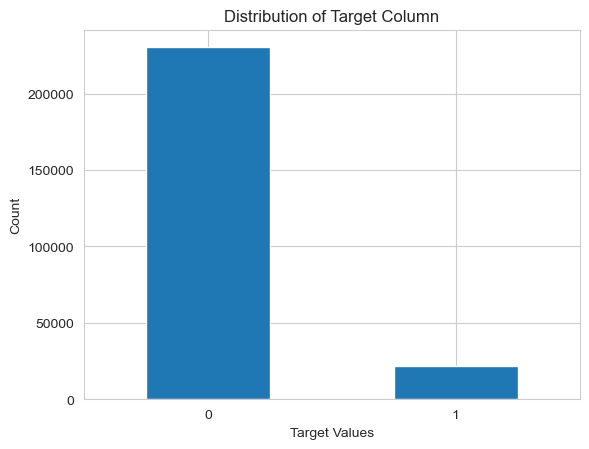

In [352]:
#Plotting the graph for Non-Defaulters(Target value 0) and Defaulters(Target value 1)
app_data.TARGET.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.title('Distribution of Target Column')
plt.show()

In [353]:
#Storing the count of Non-Defaulters(Target value 0) to target_0 and Defaulters(Target value 1) to target_1
target_0=app_data.loc[app_data["TARGET"]==0]
target_1=app_data.loc[app_data["TARGET"]==1]

In [354]:
#Checking the length of Non-Defaulters and Defaulters
len(target_0),len(target_1)

(230302, 21835)

In [355]:
#Rechecking with TARGET column
app_data["TARGET"].value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

In [356]:
#In order to check the data imbalance we are calculating the ratio of non-defaulters to defaulters 
np.round(len(target_0)/len(target_1),2)

10.55

##### For every 1 instance of target_1(defaulter) there are approximately 10.55 instances of target_0(non-defalters)

## UNIVARIATE ANALYSIS

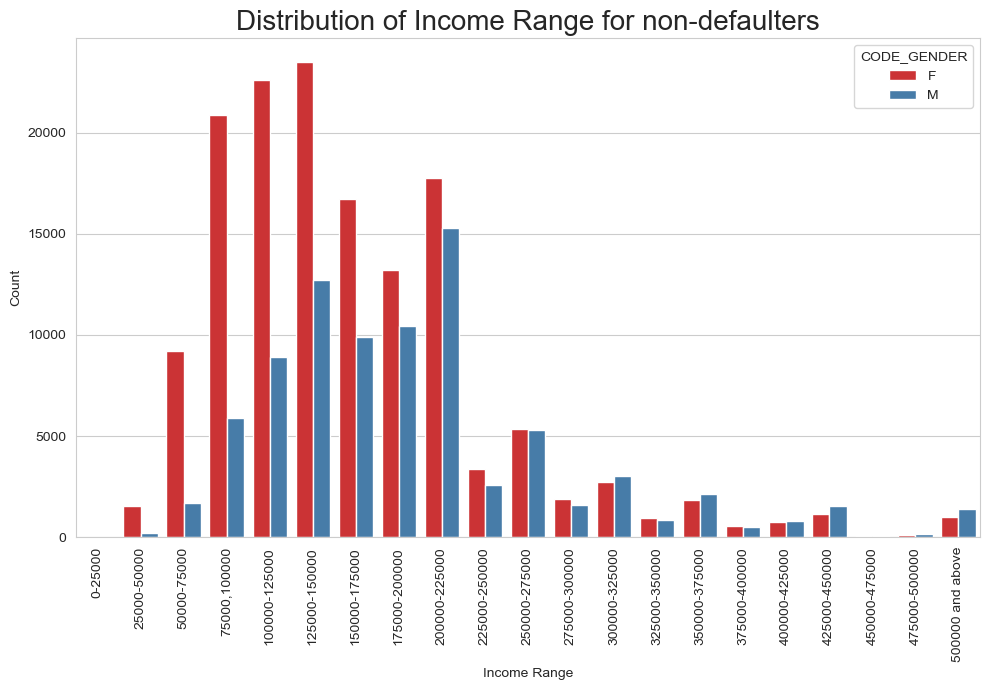

In [359]:
#Plotting a bar chart for those having no difficulty in repaying the loan i.e for non-defaulters
plt.figure(figsize=(10,7))
sns.countplot(data=target_0,x="AMT_INCOME_RANGE",hue="CODE_GENDER", palette='Set1')
plt.xticks(rotation=90)
plt.title("Distribution of Income Range for non-defaulters", fontsize=20)
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('plot1.png')
plt.show()

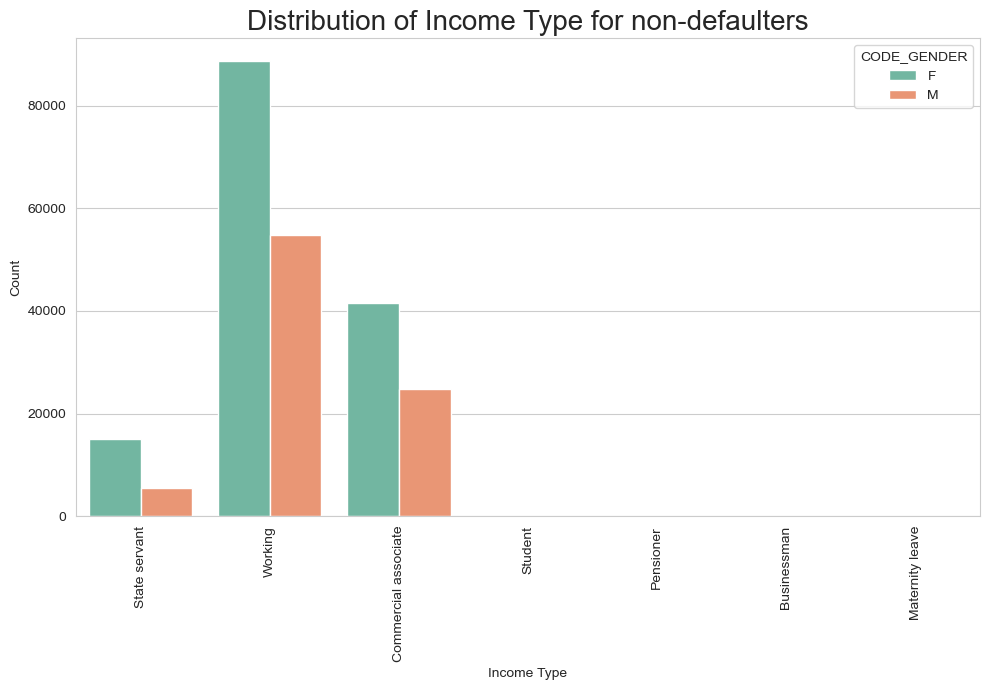

In [360]:
# Plotting for non-defaulters with various income types across different gender.
plt.figure(figsize=(10,7))
sns.countplot(data=target_0,x="NAME_INCOME_TYPE",hue="CODE_GENDER", palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribution of Income Type for non-defaulters', fontsize=20)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('plot2.png')
plt.show()

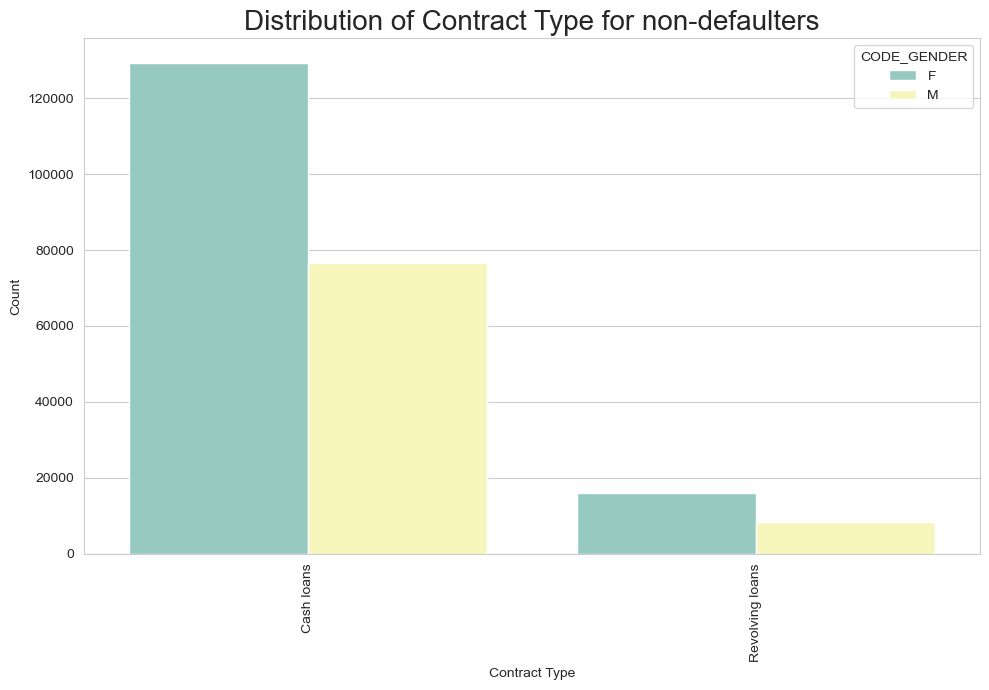

In [361]:
#Plotting for non-defaulters for the Contract type across different gender.
plt.figure(figsize=(10,7))
sns.countplot(data=target_0,x="NAME_CONTRACT_TYPE",hue="CODE_GENDER",palette='Set3')
plt.xticks(rotation=90)
plt.title('Distribution of Contract Type for non-defaulters', fontsize=20)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('plot3.png')
plt.show()

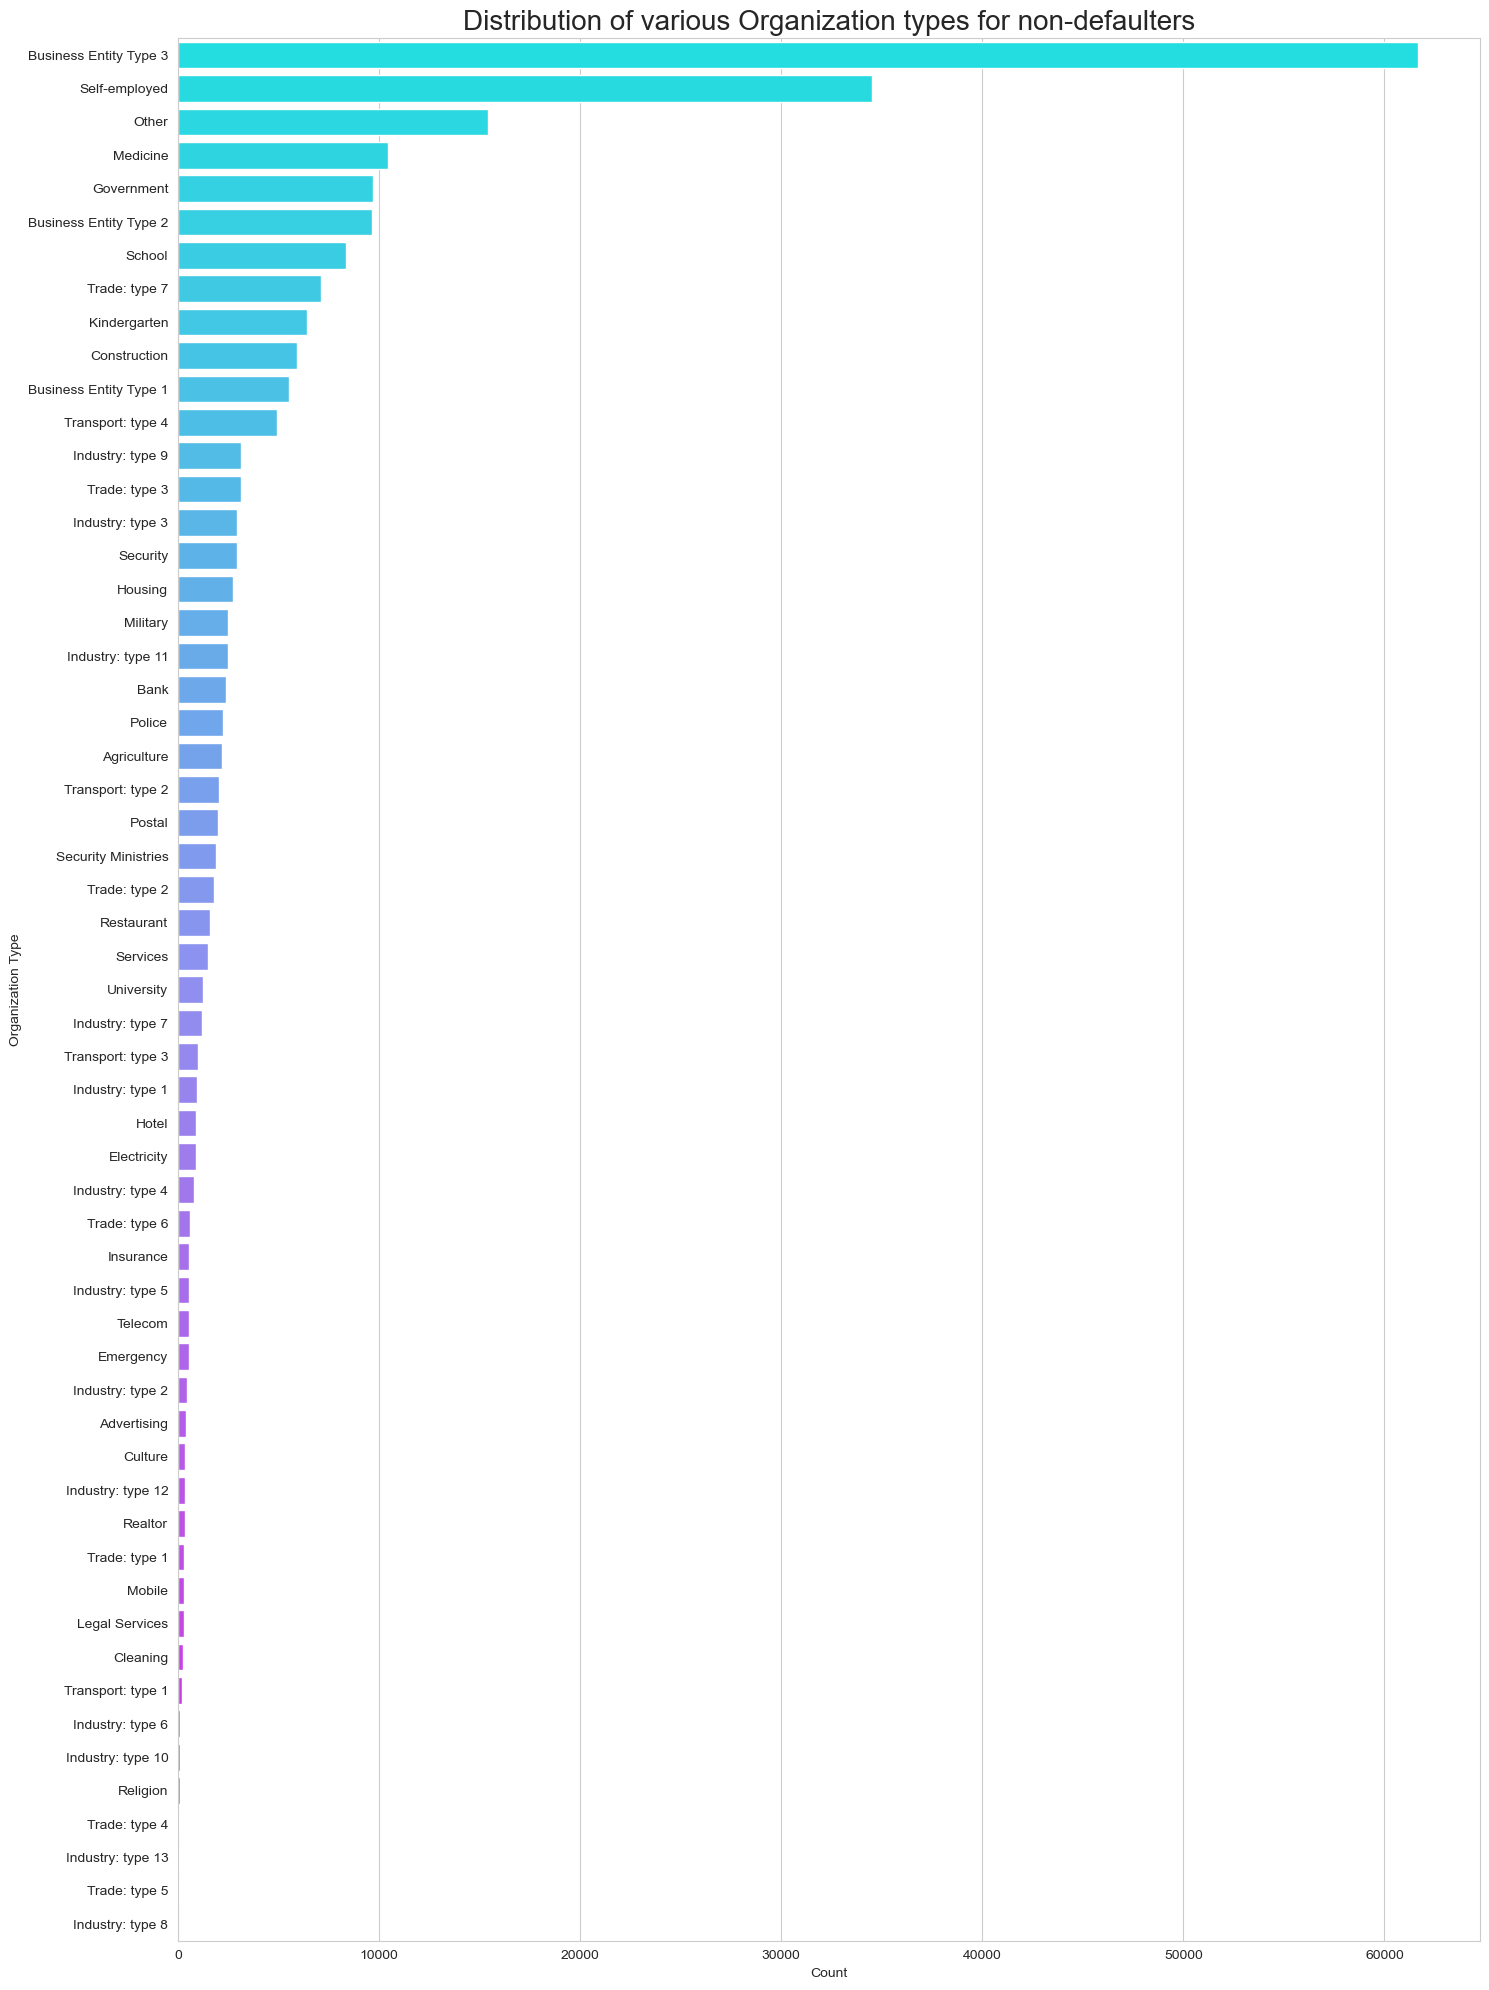

In [362]:
#Plotting for non-defaulters for various Organization Types
plt.figure(figsize=[15,20])
sns.countplot(data=target_0, y='ORGANIZATION_TYPE', order=target_0['ORGANIZATION_TYPE'].value_counts().index, palette='cool')
plt.title("Distribution of various Organization types for non-defaulters", fontsize=20)
plt.xlabel('Count')
plt.ylabel('Organization Type')
plt.tight_layout()
plt.savefig('plot4.png')
plt.show()

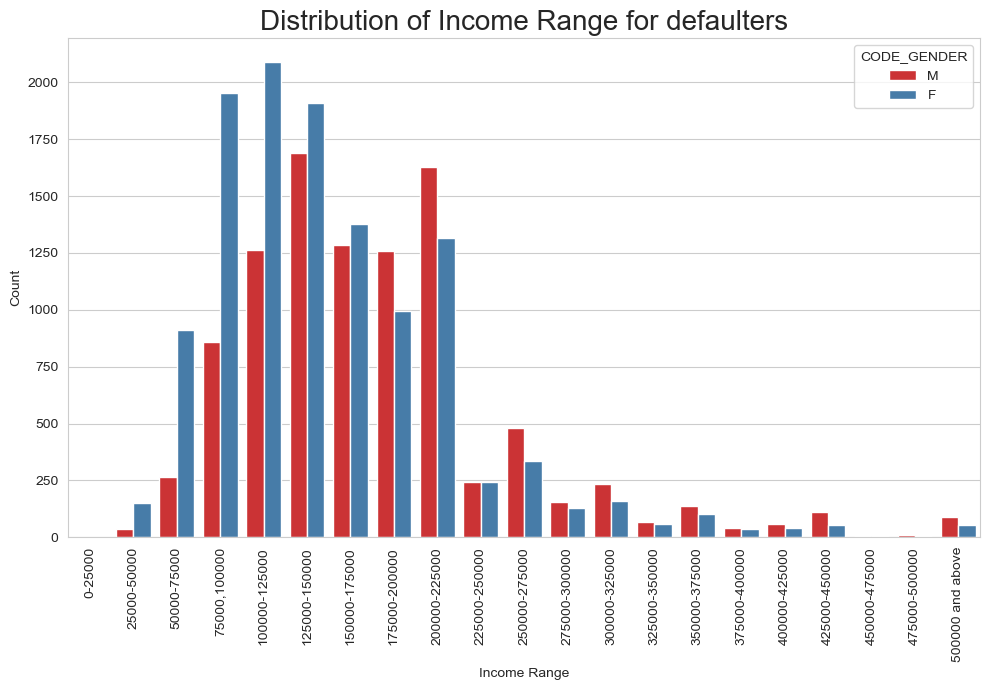

In [363]:
#Plotting a bar chart for those having difficulty in repaying the loan i.e for defaulters
plt.figure(figsize=(10,7))
sns.countplot(data=target_1, x="AMT_INCOME_RANGE", hue="CODE_GENDER", palette='Set1')
plt.xticks(rotation=90)
plt.title("Distribution of Income Range for defaulters", fontsize=20)
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('plot5.png')
plt.show()

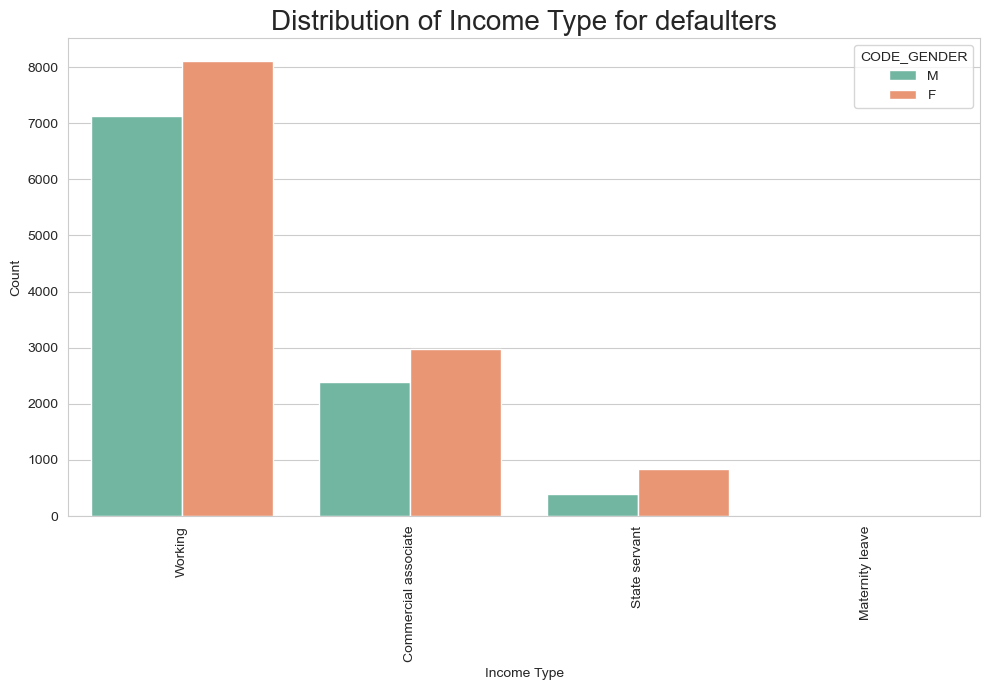

In [364]:
# Plotting defaulters for the various Income types across different gender.
plt.figure(figsize=(10,7))
sns.countplot(data=target_1, x="NAME_INCOME_TYPE", hue="CODE_GENDER", palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribution of Income Type for defaulters', fontsize=20)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('plot6.png')
plt.show()

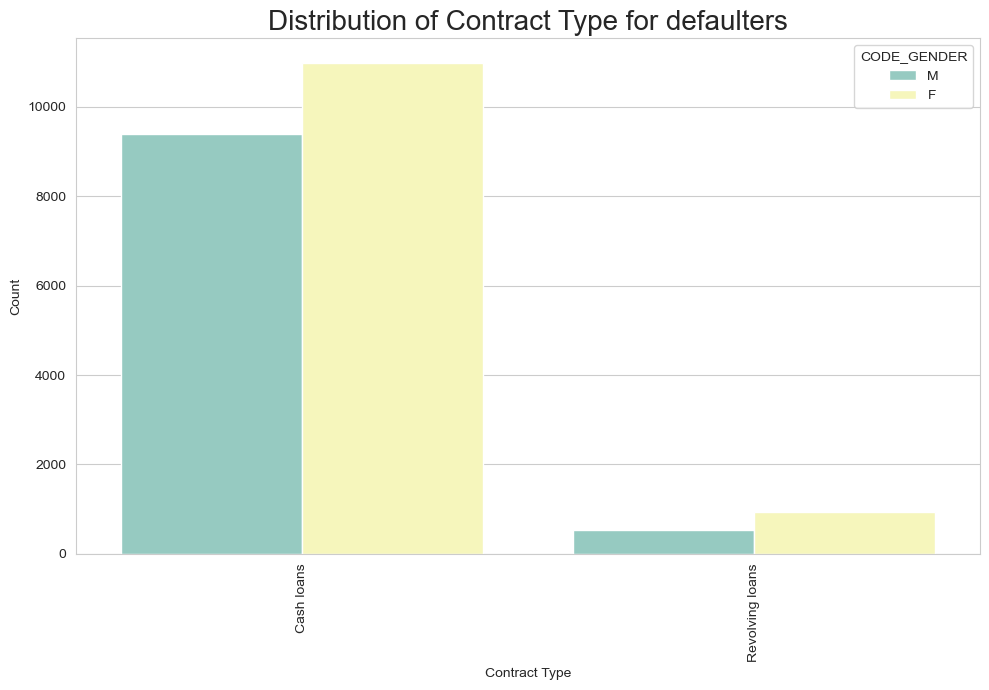

In [365]:
# Plotting defaulters for the Contract type across different gender.
plt.figure(figsize=(10,7))
sns.countplot(data=target_1, x="NAME_CONTRACT_TYPE", hue="CODE_GENDER", palette='Set3')
plt.xticks(rotation=90)
plt.title('Distribution of Contract Type for defaulters', fontsize=20)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('plot7.png')
plt.show()


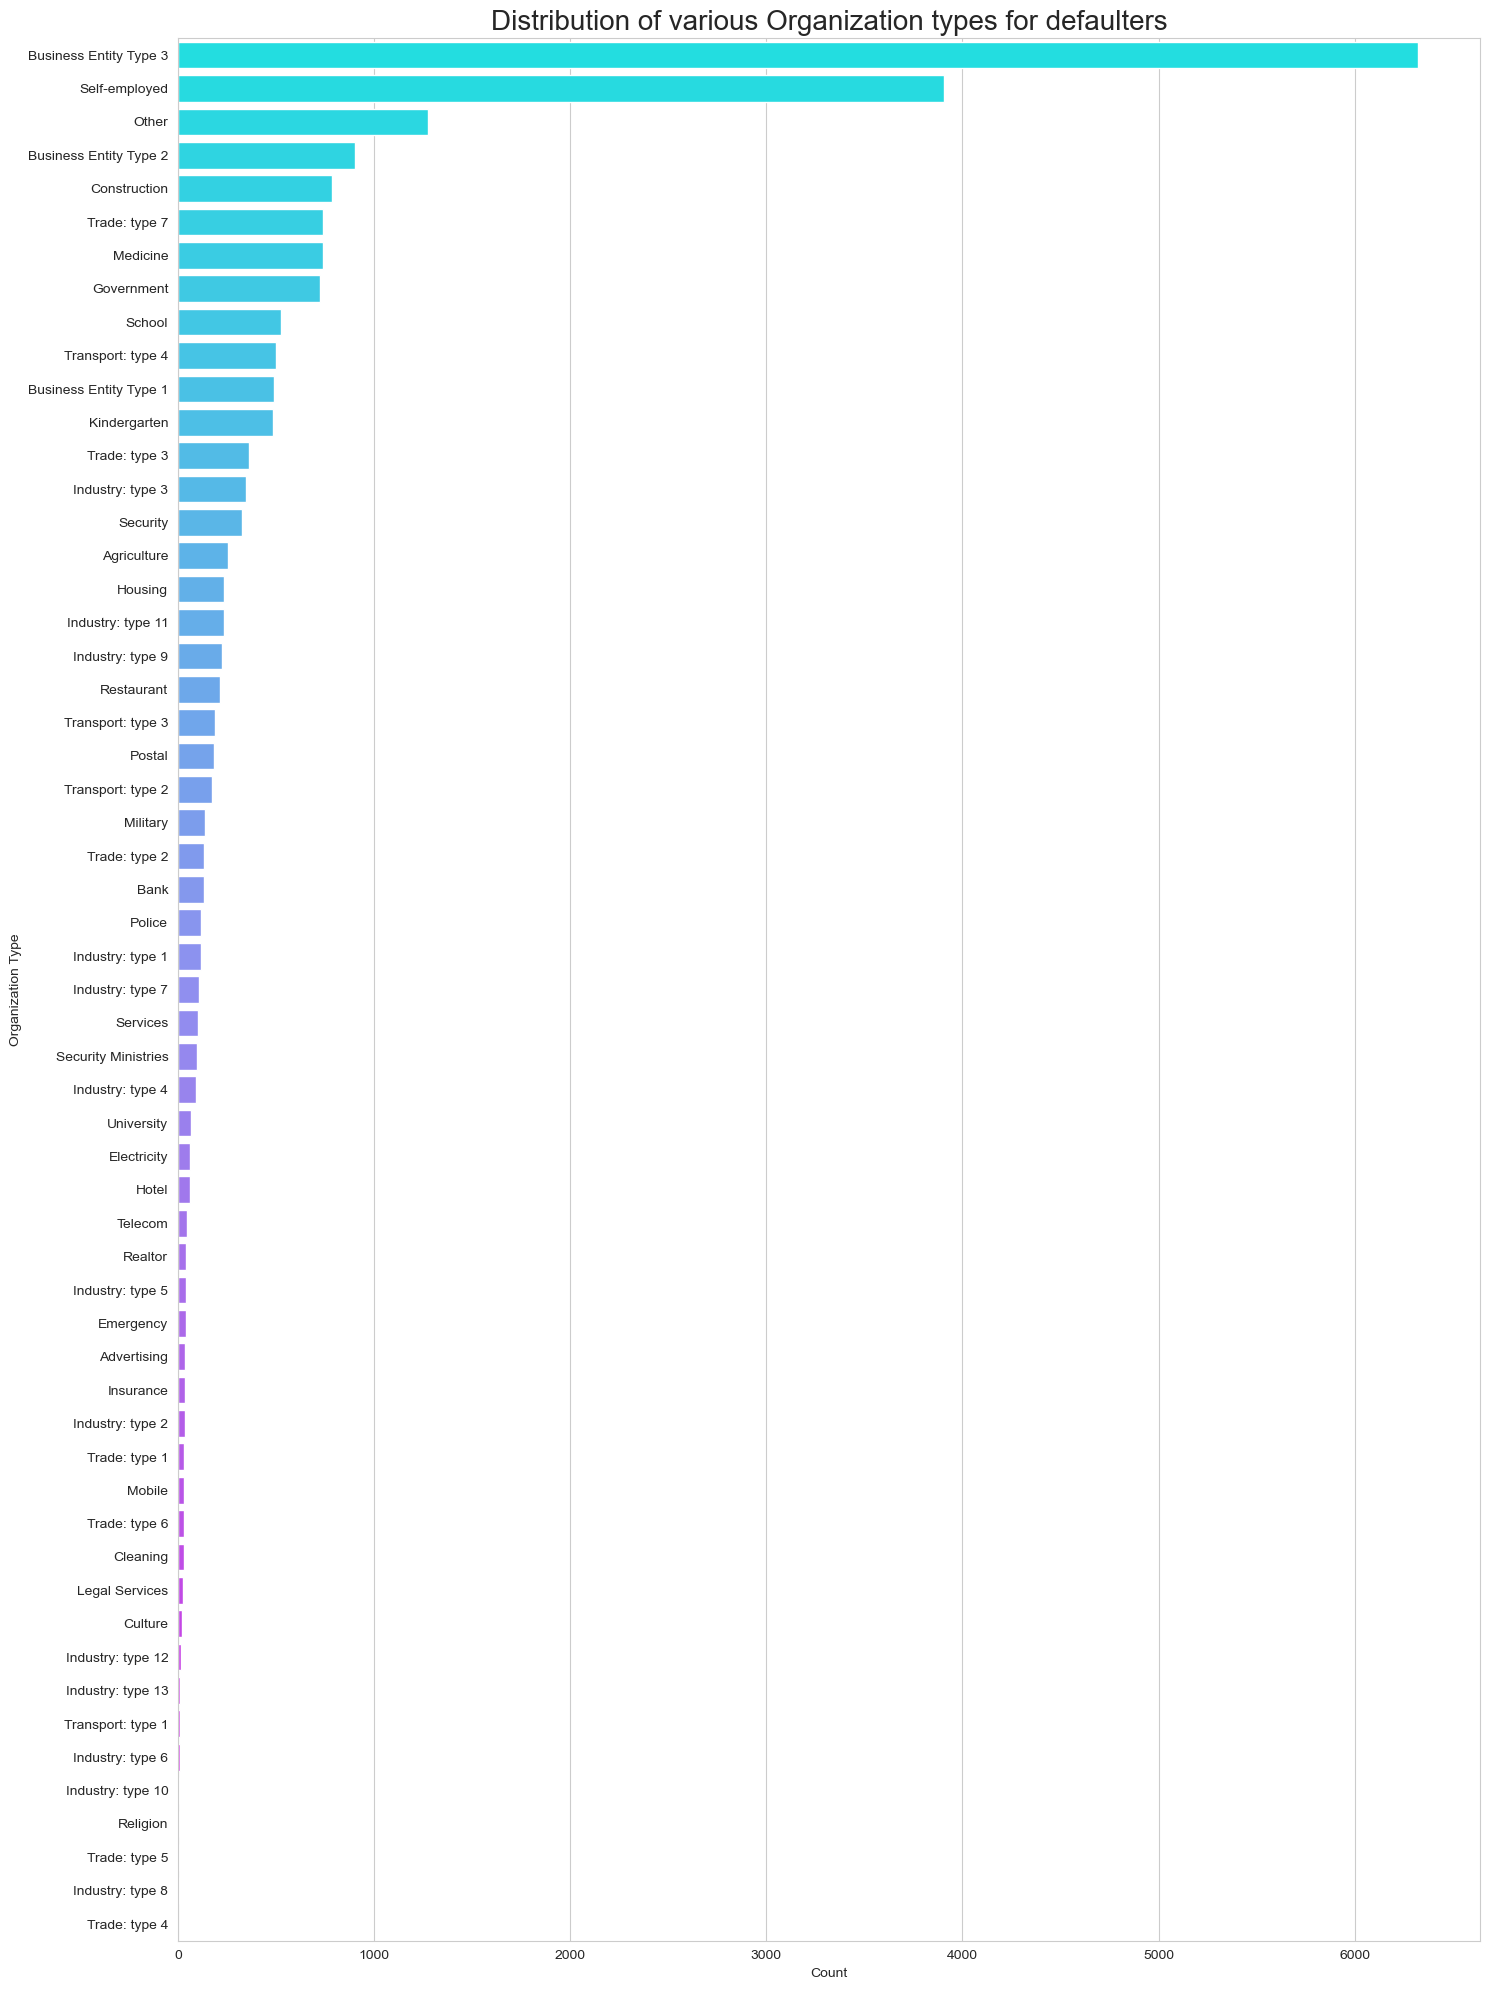

In [366]:
#Plotting for defaulters for various Organization Types
plt.figure(figsize=[15,20])
sns.countplot(data=target_1, y='ORGANIZATION_TYPE', order=target_1['ORGANIZATION_TYPE'].value_counts().index, palette='cool')
plt.title("Distribution of various Organization types for defaulters", fontsize=20)
plt.xlabel('Count')
plt.ylabel('Organization Type')
plt.tight_layout()
plt.savefig('plot8.png')
plt.show()

In [367]:
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
CNT_CHILDREN                      int32
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
CNT_FAM_MEMBERS                   int32
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64


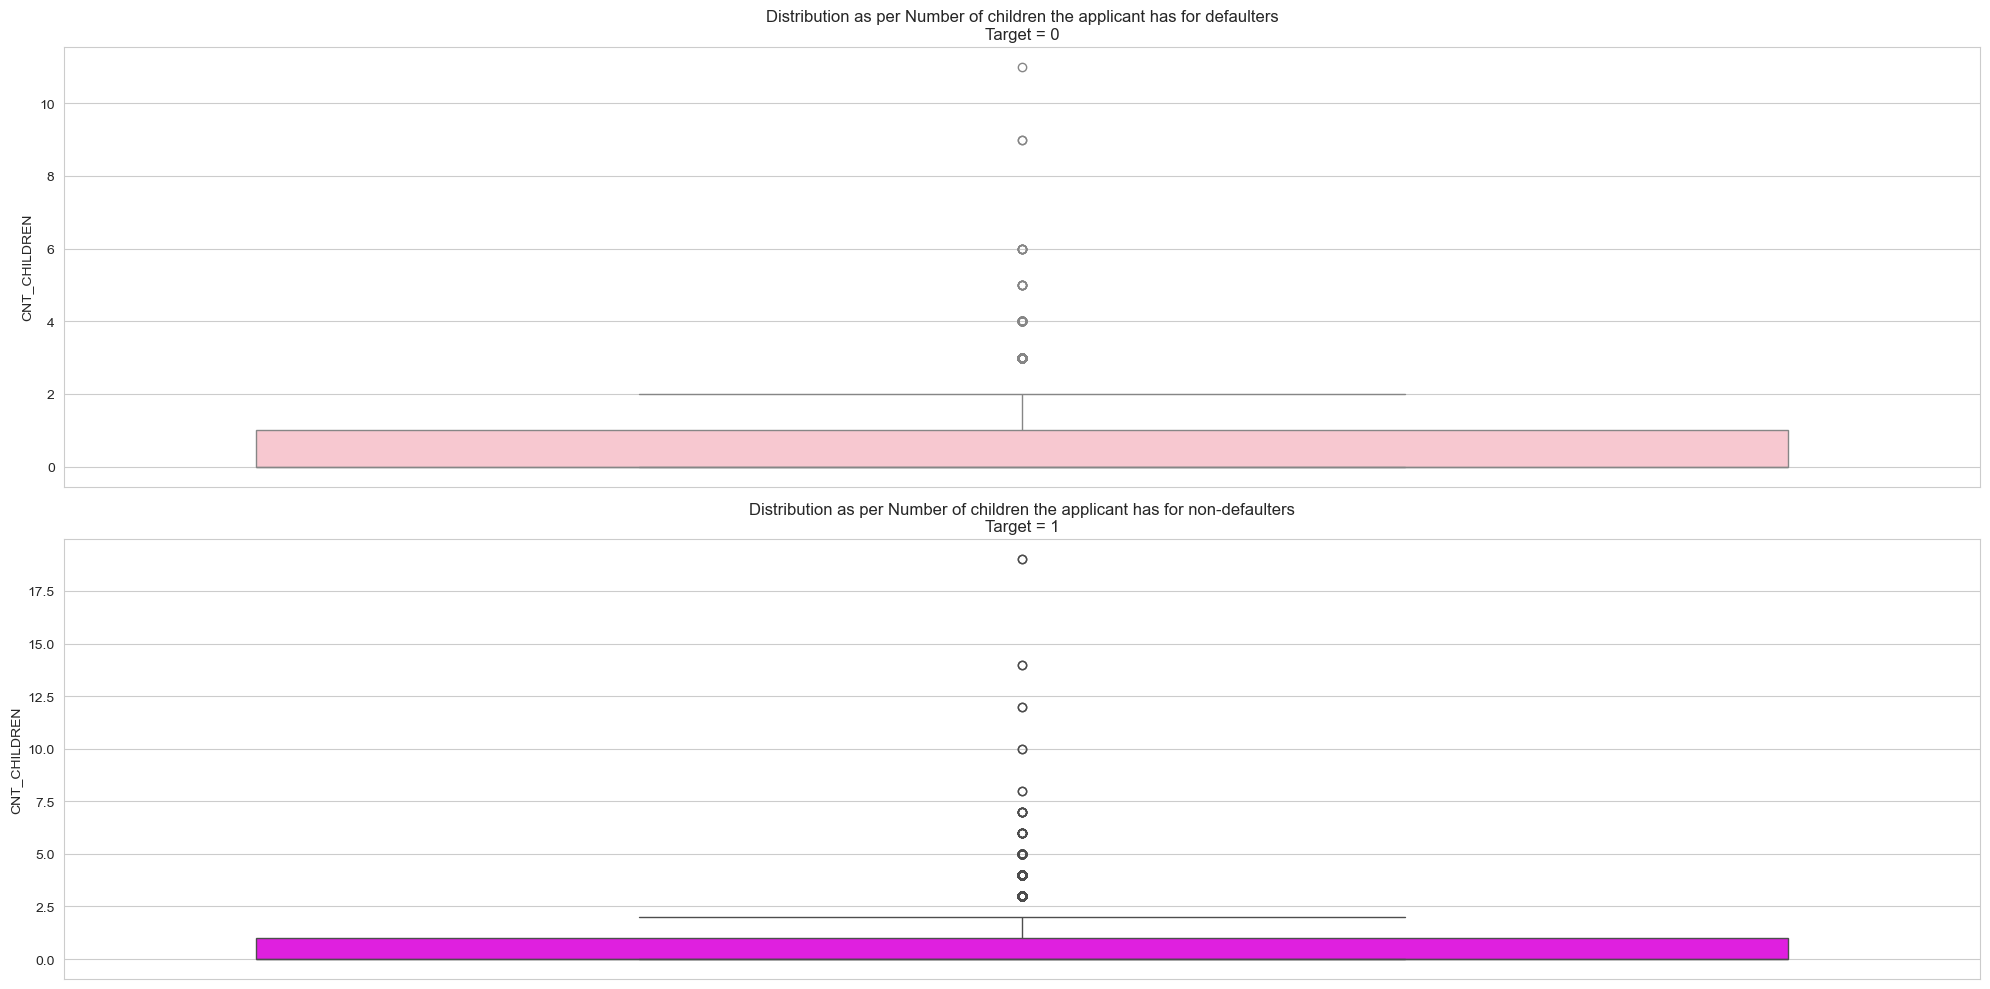

In [368]:
#Plotting as per Number of children the applicant has for defaulters and non-defaulters
plt.figure(figsize = [20, 10])

plt.subplot(2, 1, 1)
plt.title("Distribution as per Number of children the applicant has for defaulters\nTarget = 0")
sns.boxplot(target_1.CNT_CHILDREN, color = 'pink')

plt.subplots_adjust(hspace = 0.5)
plt.subplot(2, 1, 2)
plt.title("Distribution as per Number of children the applicant has for non-defaulters\nTarget = 1")
sns.boxplot(target_0.CNT_CHILDREN, color = 'magenta')
plt.tight_layout()
plt.savefig('plot9.png')
plt.show()

## Bivariate Analysis

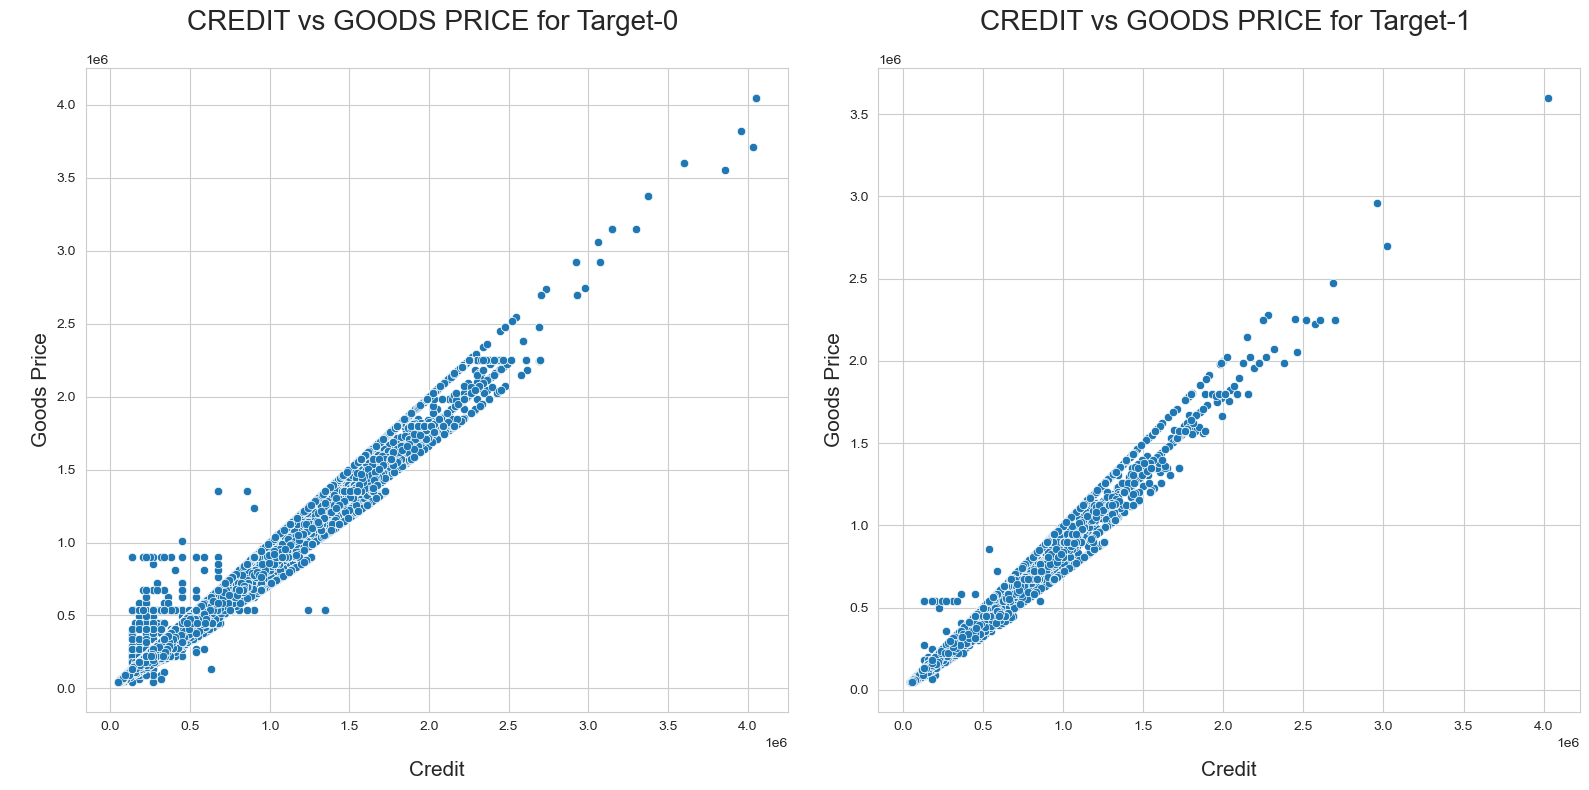

In [370]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset.
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_0)
plt.title('CREDIT vs GOODS PRICE for Target-0 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_1)
plt.title('CREDIT vs GOODS PRICE for Target-1 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)
plt.tight_layout()
plt.savefig('plot10.png')
plt.show()

##### Conclusions from the graph:
With the scatter plot,we can determine that AMT CREDIT and AMT GOODS PRICE are highly correlated,which means if increase in goods price,the credit increased directly and vice versa.

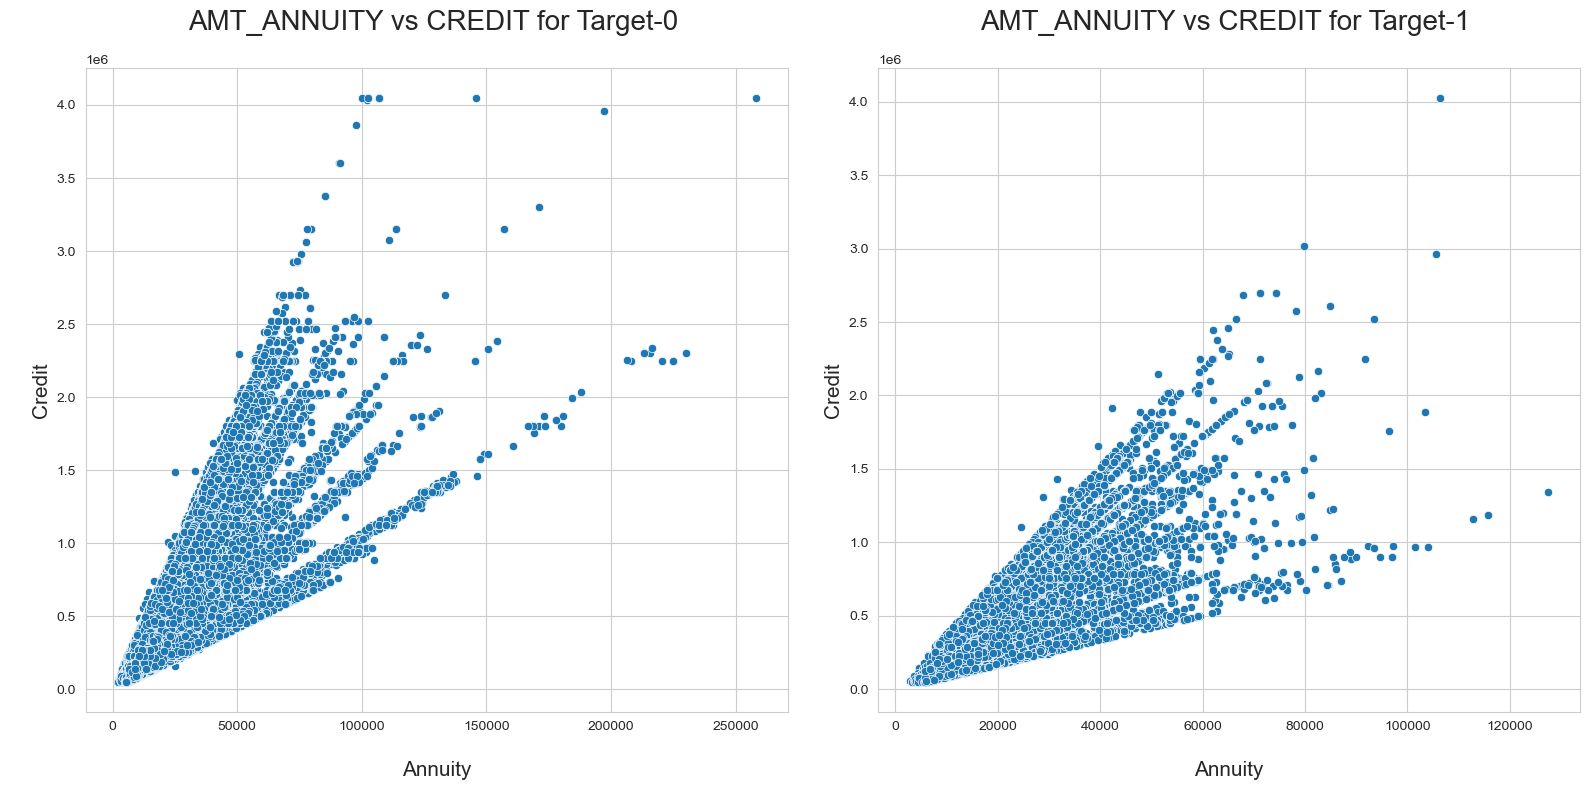

In [372]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset.
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT',data=target_0)
plt.title('AMT_ANNUITY vs CREDIT for Target-0 \n', fontsize=20)
plt.xlabel('\nAnnuity', fontsize=15)
plt.ylabel('\nCredit', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT',data=target_1)
plt.title('AMT_ANNUITY vs CREDIT for Target-1 \n', fontsize=20)
plt.xlabel('\nAnnuity', fontsize=15)
plt.ylabel('\nCredit', fontsize=15)
plt.tight_layout()
plt.savefig('plot11.png')
plt.show()

##### Conclusions from the graph:
With the scatter plot,we can determine that AMT_ANNUITY and AMT_CREDIT have strong positive correlation. This means that as Annuity Amount increases, so does Credit Amount.

In [374]:
numeric_target1 = target_1[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
numeric_target0 = target_0[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

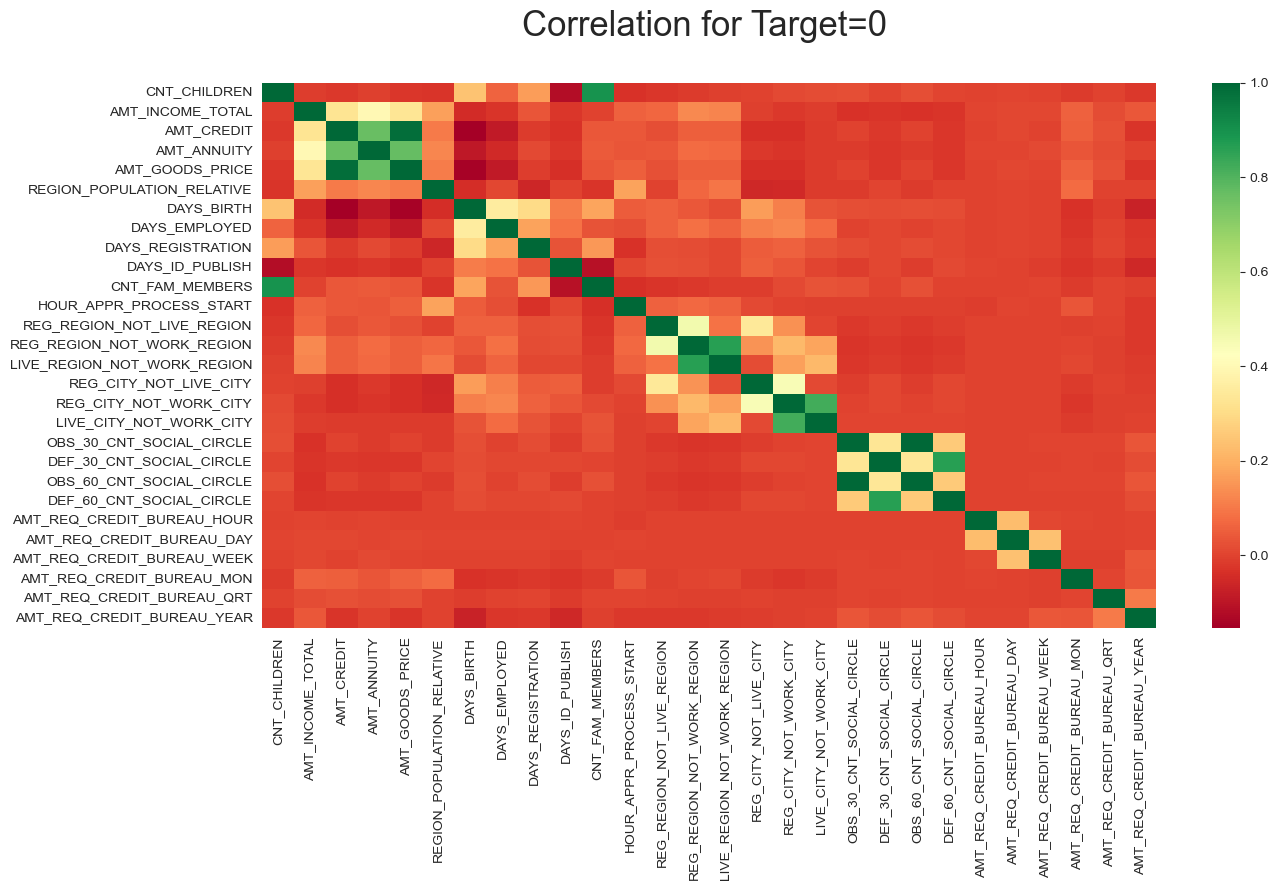

In [375]:
# Plotting the correlation for the Target_0.
plt.figure(figsize=[14,9])
sns.heatmap(numeric_target0.corr(), annot=False, cmap='RdYlGn')
plt.title('Correlation for Target=0 \n', fontsize=25)
plt.tight_layout()
plt.savefig('plot12.png')
plt.show()

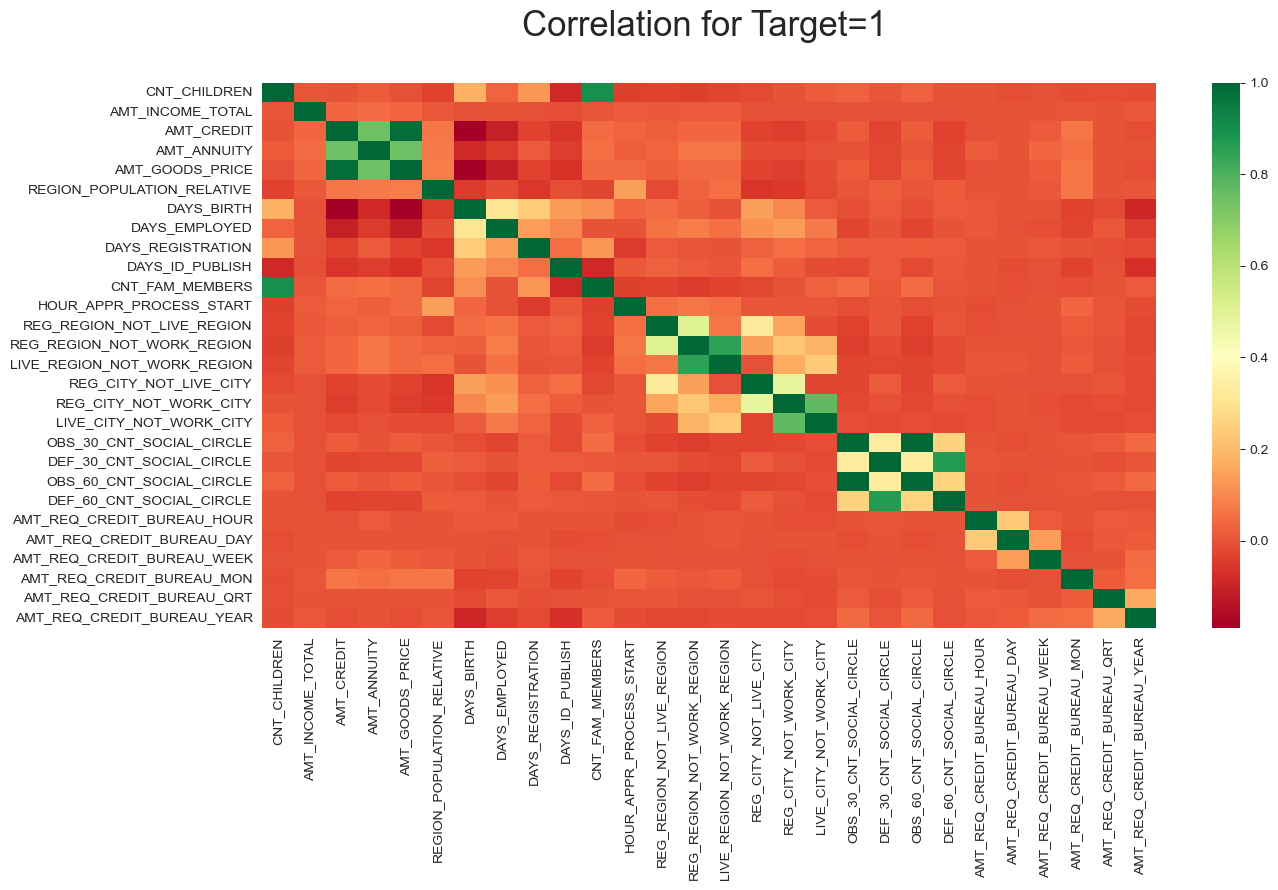

In [376]:
# Plotting the correlation for the Target_1.

plt.figure(figsize=[14,9])
sns.heatmap(numeric_target1.corr(), annot=False, cmap='RdYlGn')
plt.title('Correlation for Target=1 \n', fontsize=25)
plt.tight_layout()
plt.savefig('plot13.png')
plt.show()

## Finding Outliers

### Univariate Analysis

##### For Target=0 & 1

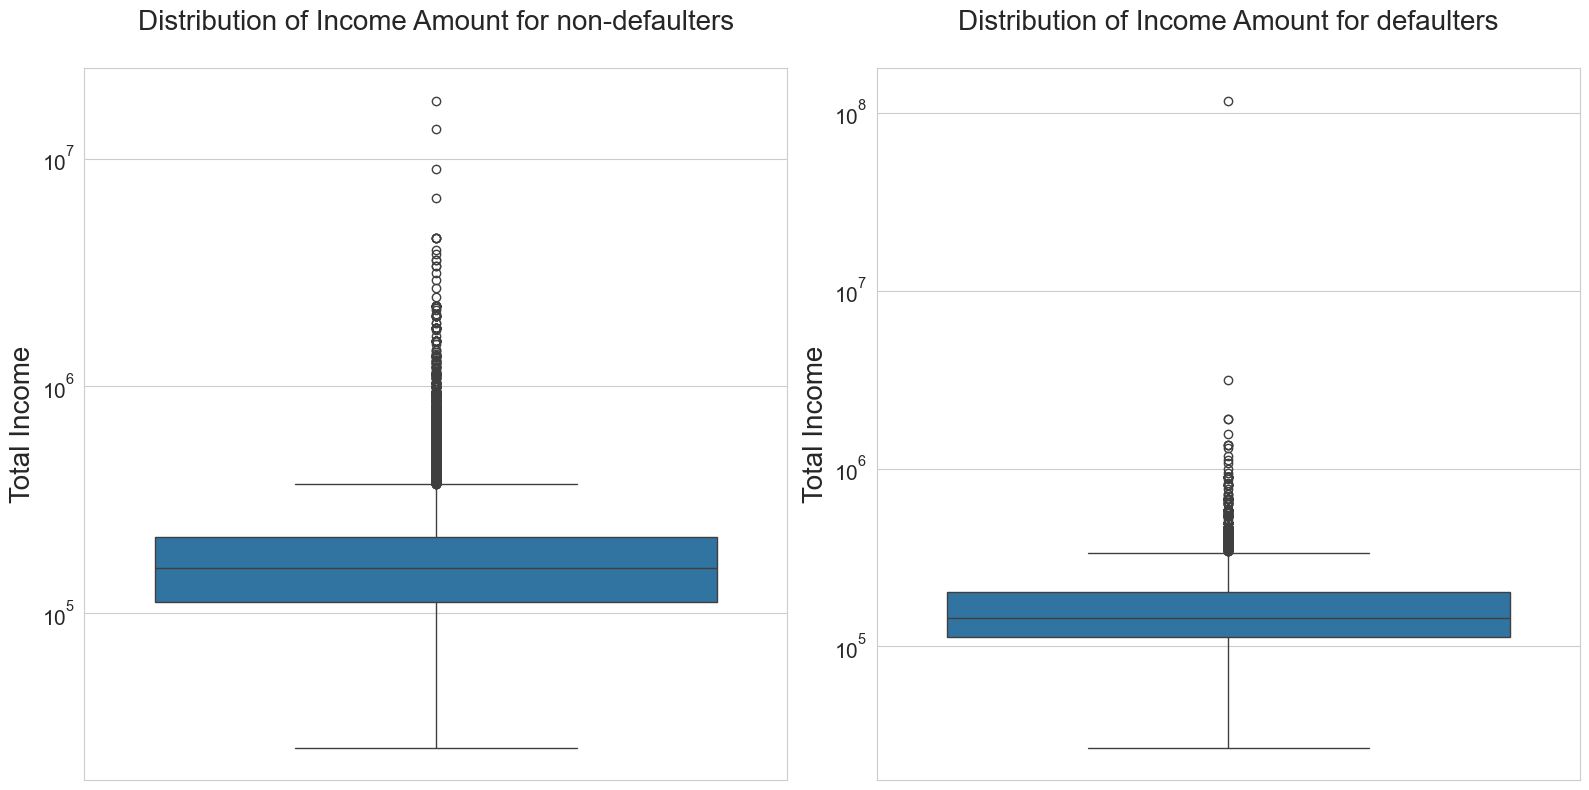

In [380]:
# Distribution of Income Amount for Target=0 and Target=1
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_INCOME_TOTAL')      #for target_0
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount for non-defaulters\n', fontsize=20)

plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.boxplot(data=target_1, y='AMT_INCOME_TOTAL')    #for target_1
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount for defaulters\n', fontsize=20)
plt.tight_layout()
plt.savefig('plot14.png')
plt.show()

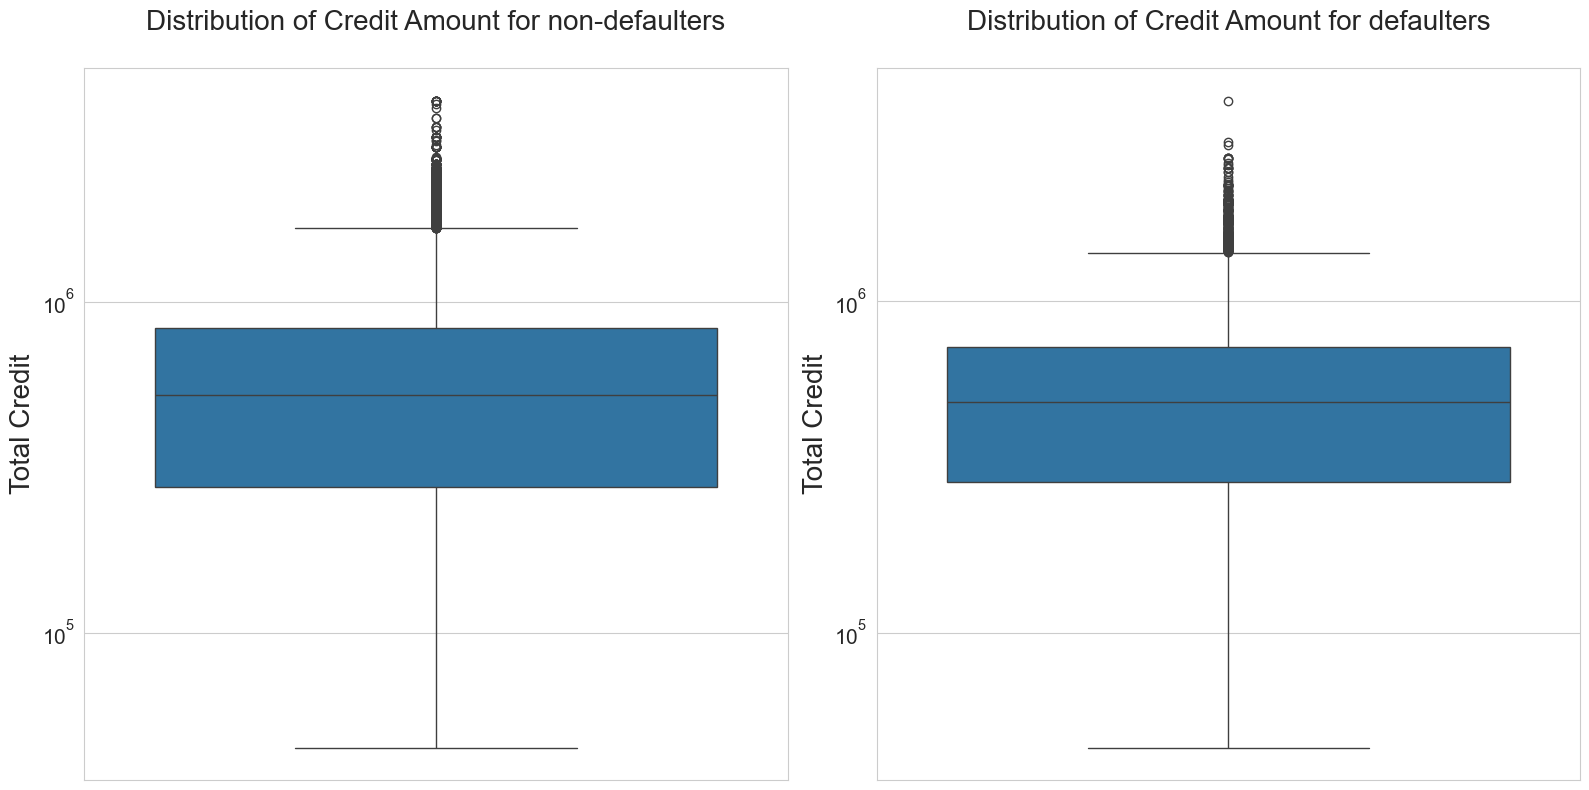

In [381]:
# Distribution of Credit Amount, for Target=0 and Target=1
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount for non-defaulters\n', fontsize=20)

plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.boxplot(data=target_1, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount for defaulters\n', fontsize=20)
plt.tight_layout()
plt.savefig('plot15.png')
plt.show()

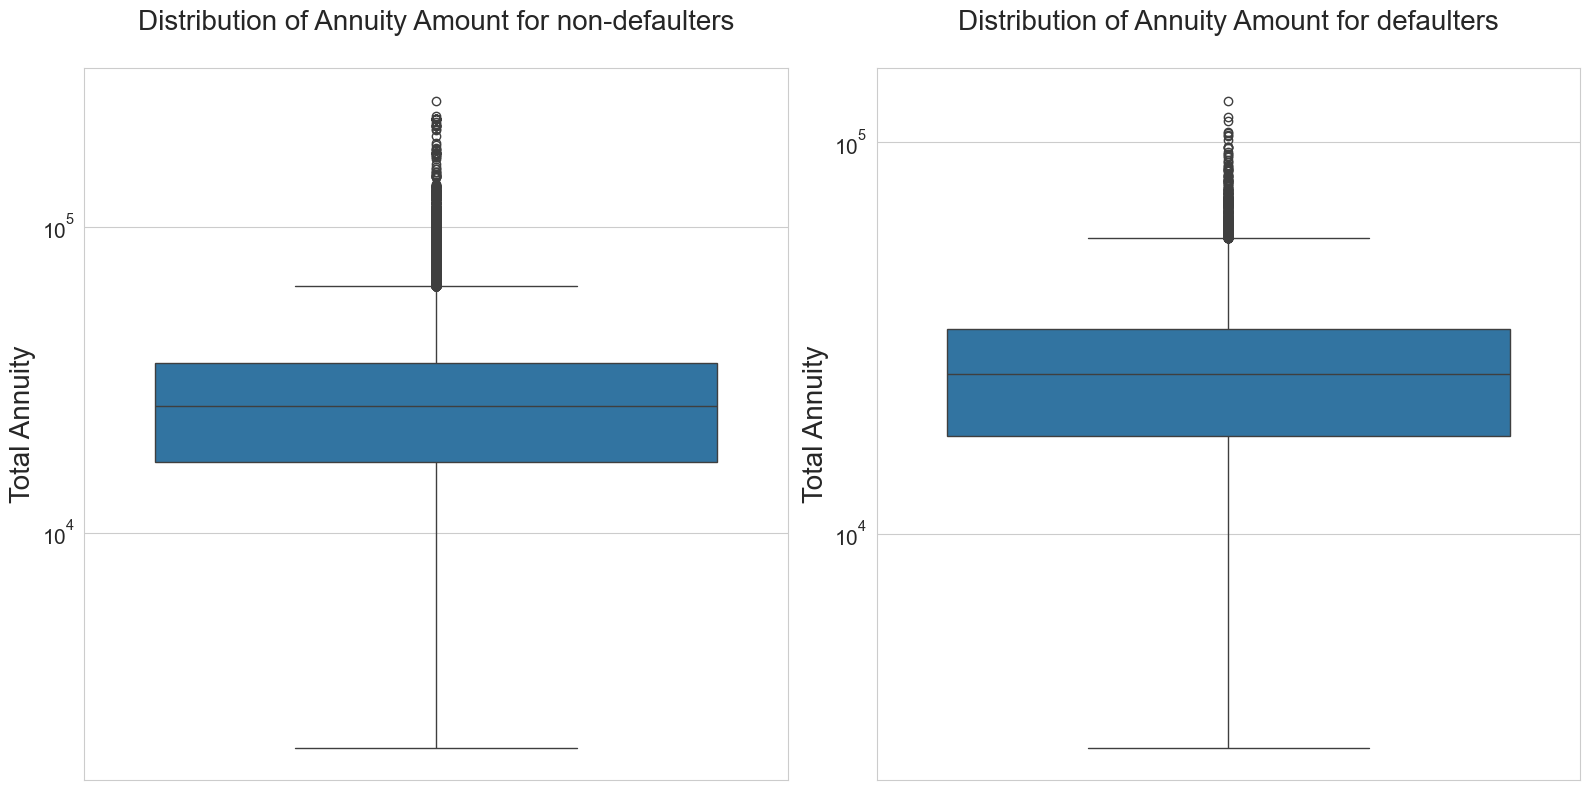

In [382]:
# Distribution of Annuity, for Target=0 and Target=1
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount for non-defaulters\n', fontsize=20)

plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.boxplot(data=target_1, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount for defaulters\n', fontsize=20)

plt.tight_layout()
plt.savefig('plot16.png')
plt.show()


### Multivariate Analysis

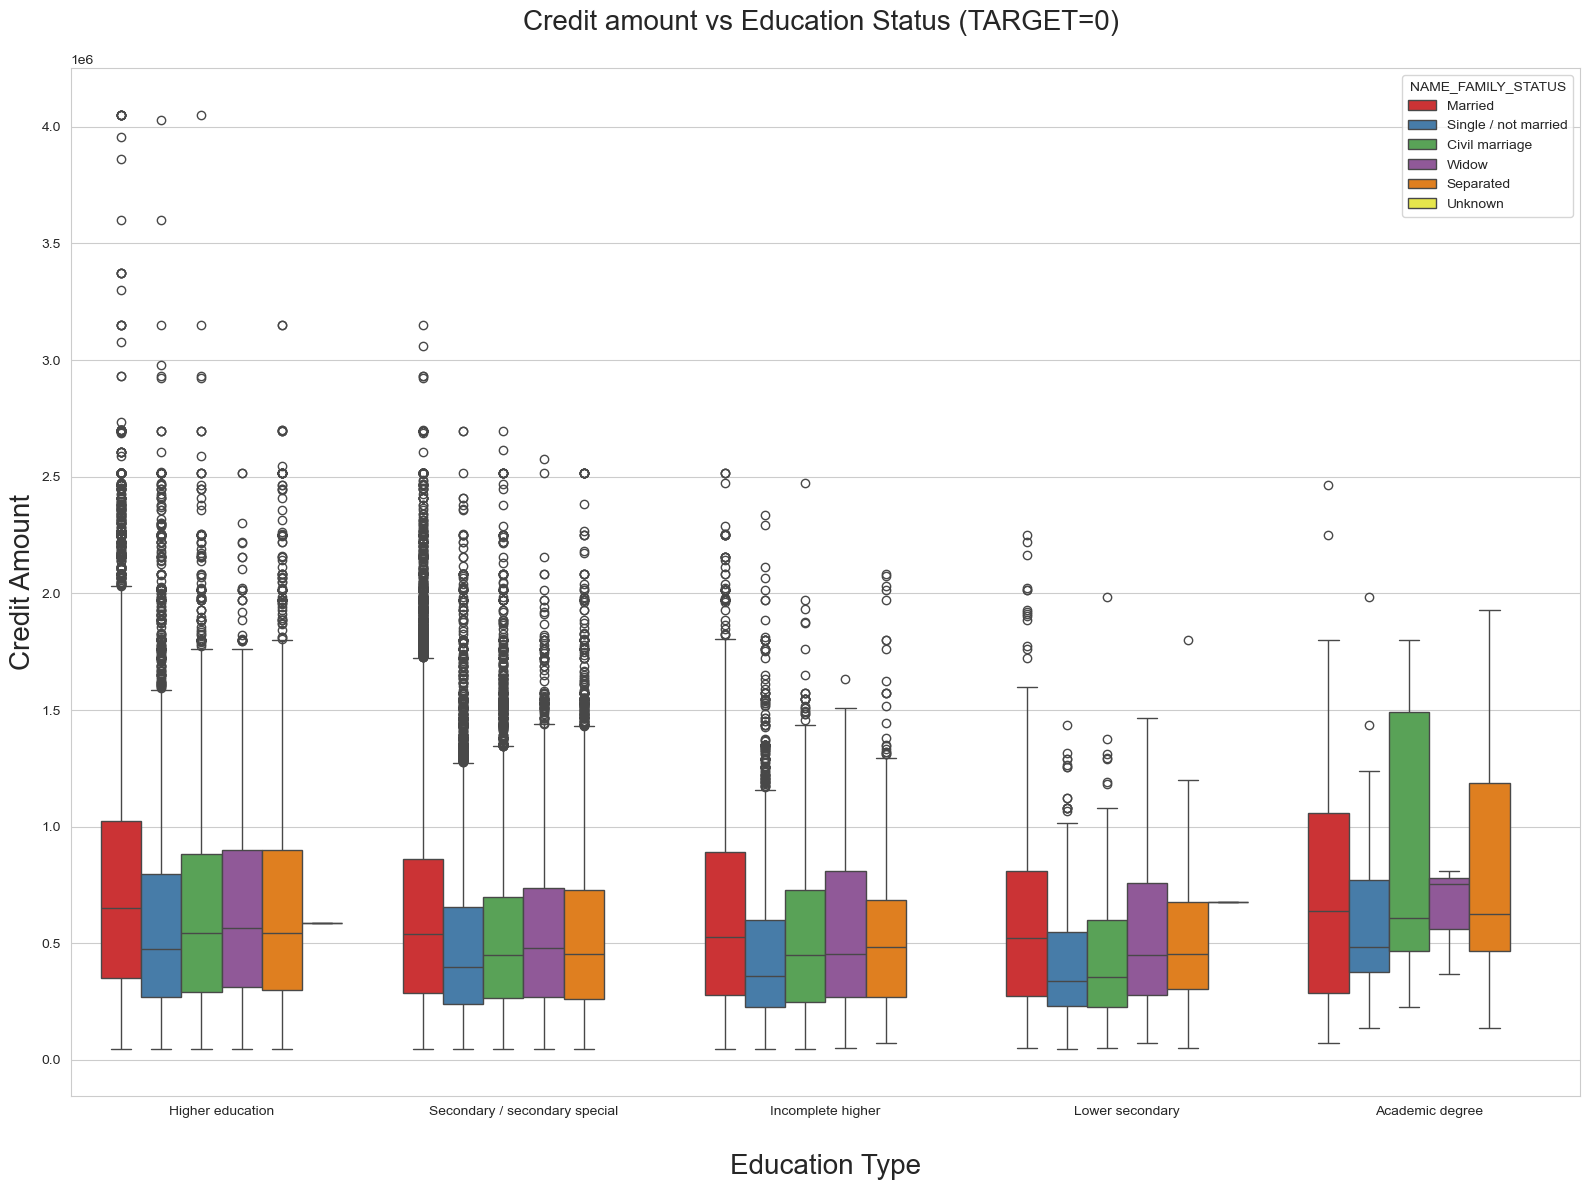

In [384]:
# Box Plot for Target = 0, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=0) \n', fontsize=20)
plt.tight_layout()
plt.savefig('plot17.png')
plt.show()

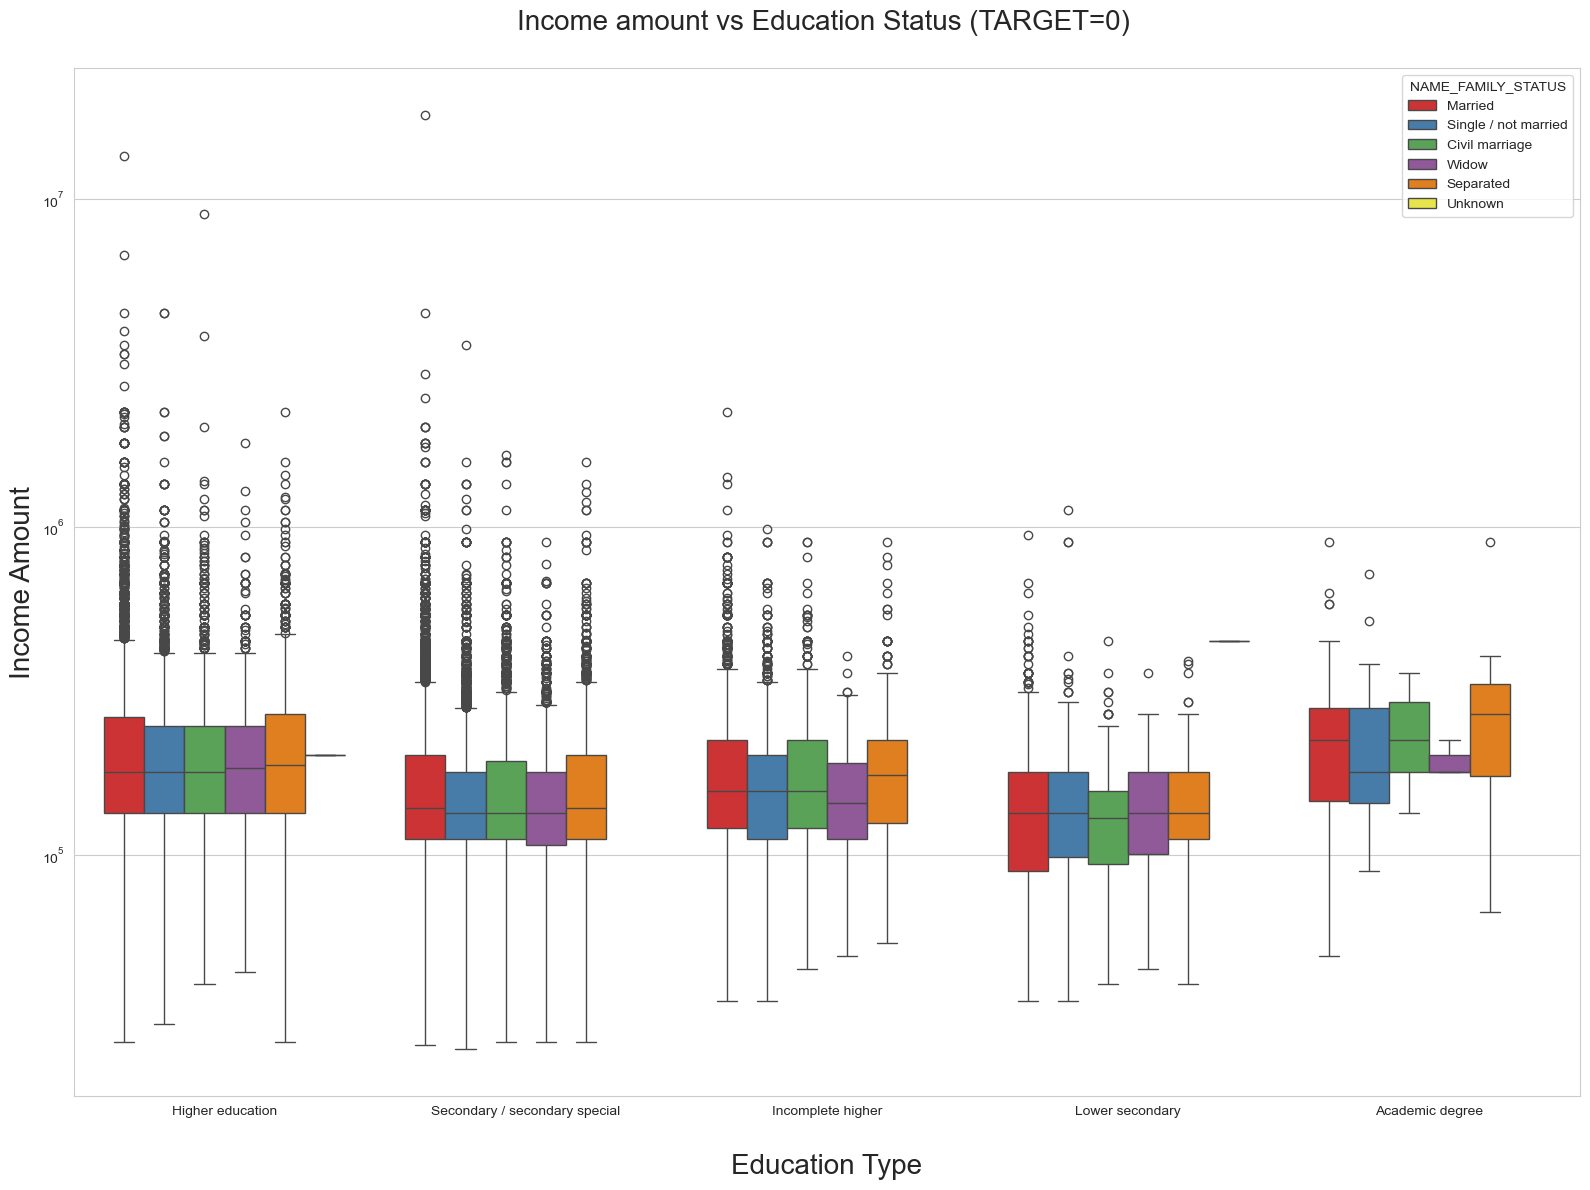

In [385]:
# Box Plotting for the Target = 0, Income Amount
plt.figure(figsize=[16,12])

sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=0) \n', fontsize=20)
plt.tight_layout()
plt.savefig('plot18.png')
plt.show()

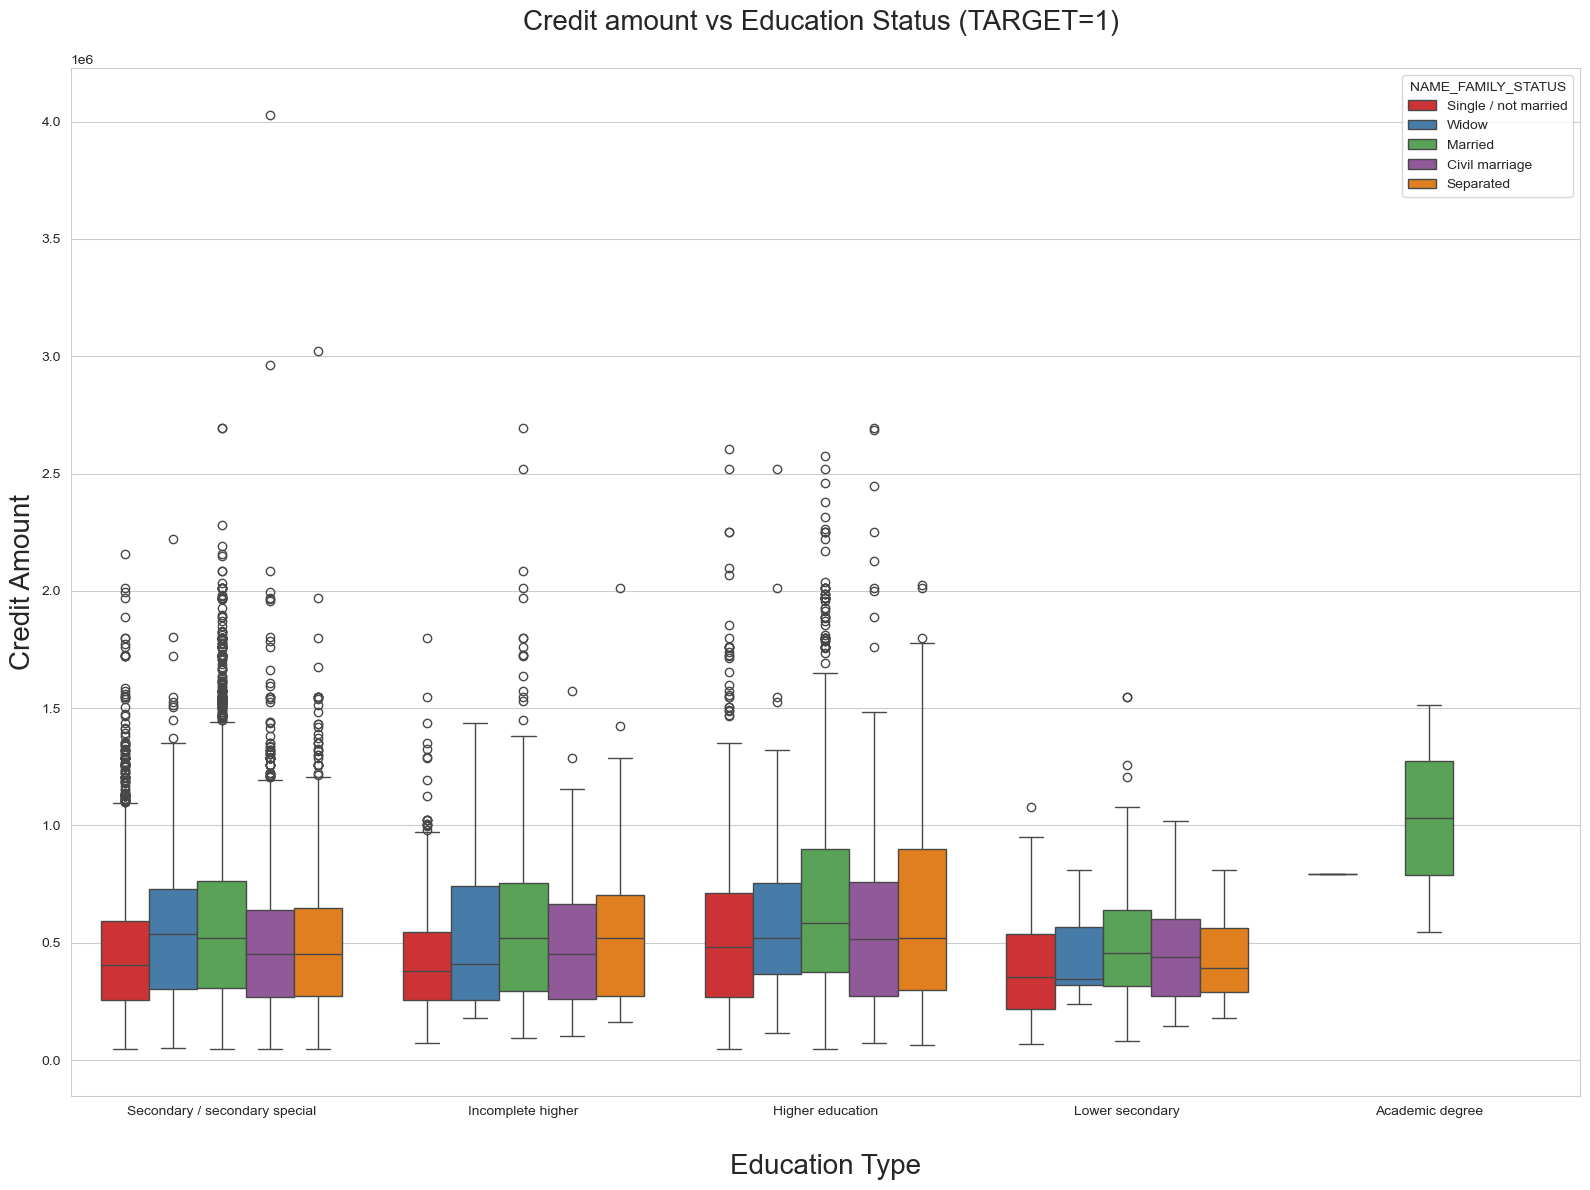

In [386]:
# Box Plotting for the Target = 1, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.tight_layout()
plt.savefig('plot19.png')
plt.show()

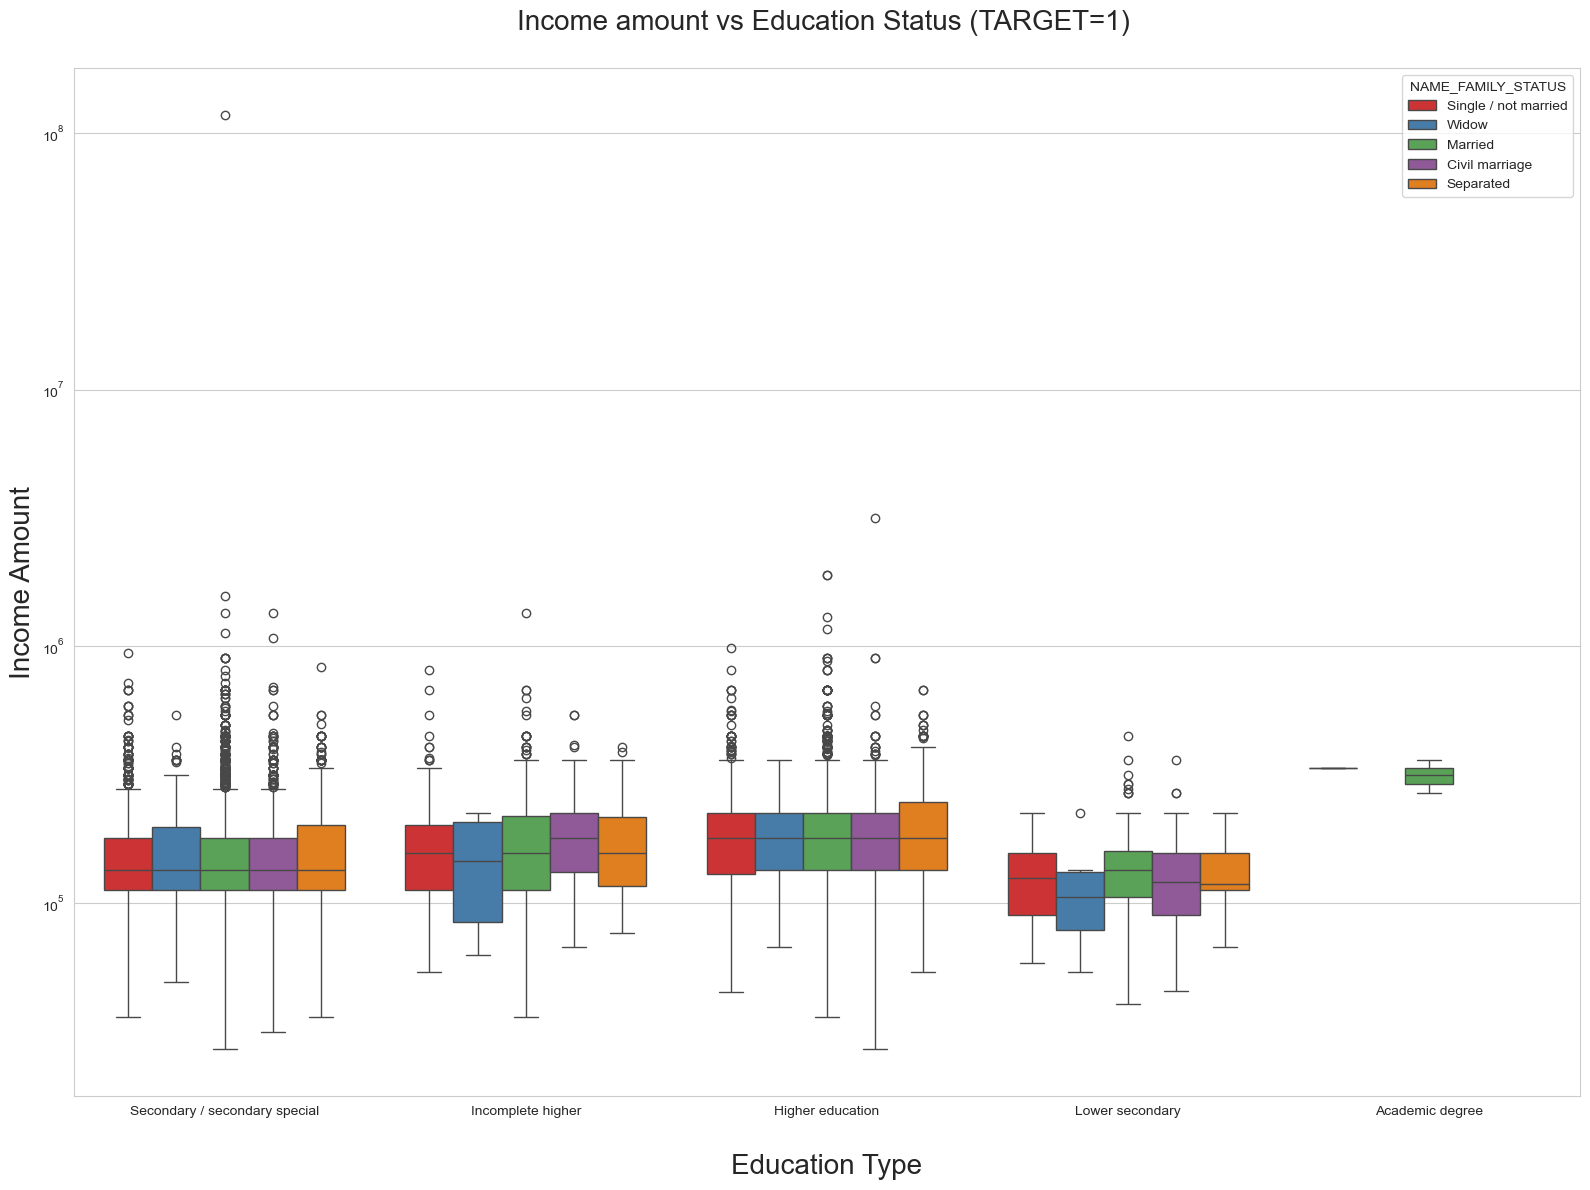

In [387]:
# Box Plotting for the Target = 1, Income Amount
plt.figure(figsize=[16,12])

sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.tight_layout()
plt.savefig('plot20.png')
plt.show()

### Now let's work on previous_application dataset

In [389]:
#Displaying first 5 rows of the dataset
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [390]:
#Checking number of rows and columns in previous_application.csv
print(prev_data.shape)

(1670214, 37)


In [391]:
#Checking missing values in previous_application.csv
round((prev_data.isnull().sum() * 100 / len(prev_data)).sort_values(ascending=False), 2)

RATE_INTEREST_PRIVILEGED      99.64
RATE_INTEREST_PRIMARY         99.64
AMT_DOWN_PAYMENT              53.64
RATE_DOWN_PAYMENT             53.64
NAME_TYPE_SUITE               49.12
NFLAG_INSURED_ON_APPROVAL     40.30
DAYS_TERMINATION              40.30
DAYS_LAST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_FIRST_DUE                40.30
DAYS_FIRST_DRAWING            40.30
AMT_GOODS_PRICE               23.08
AMT_ANNUITY                   22.29
CNT_PAYMENT                   22.29
PRODUCT_COMBINATION            0.02
AMT_CREDIT                     0.00
NAME_YIELD_GROUP               0.00
NAME_PORTFOLIO                 0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
SK_ID_PREV                     0.00
NAME_GOODS_CATEGORY            0.00
NAME_CLIENT_TYPE               0.00
CODE_REJECT_REASON             0.00
SK_ID_CURR                     0.00
DAYS_DECISION               

In [392]:
#Removing data columns which have more than 30% missing values
prev_data=prev_data.loc[:,(prev_data.isnull().sum() * 100 / len(prev_data))<=30]
len(prev_data.columns)

26

In [393]:
prev_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [394]:
#Now analysing NAME_CASH_LOAN_PURPOSE column
prev_data['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [395]:
# Removing the 'XNA' and 'XAP' column values from the column,
prev_data = prev_data.drop(prev_data[prev_data.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
prev_data = prev_data.drop(prev_data[prev_data.NAME_CASH_LOAN_PURPOSE=='XAP'].index)

In [396]:
# Rechecking the NAME_CASH_LOAN_PURPOSE for the values.
prev_data.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: count

In [397]:
round((prev_data.isnull().sum() * 100 / len(prev_data)).sort_values(ascending=False), 2)

AMT_ANNUITY                   0.38
CNT_PAYMENT                   0.38
SK_ID_PREV                    0.00
NAME_PAYMENT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
NAME_PRODUCT_TYPE             0.00
NAME_PORTFOLIO                0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
CODE_REJECT_REASON            0.00
DAYS_DECISION                 0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
NFLAG_LAST_APPL_IN_DAY        0.00
FLAG_LAST_APPL_PER_CONTRACT   0.00
HOUR_APPR_PROCESS_START       0.00
WEEKDAY_APPR_PROCESS_START    0.00
AMT_GOODS_PRICE               0.00
AMT_CREDIT                    0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
PRODUCT_COMBINATION           0.00
dtype: float64

In [398]:
#Now analysing AMT_ANNUITY column
prev_data["AMT_ANNUITY"].isnull().sum()

263

In [399]:
prev_data["AMT_ANNUITY"].describe()

count    69372.00
mean     25682.78
std      17426.52
min          0.00
25%      13595.17
50%      21368.25
75%      32681.25
max     418058.15
Name: AMT_ANNUITY, dtype: float64

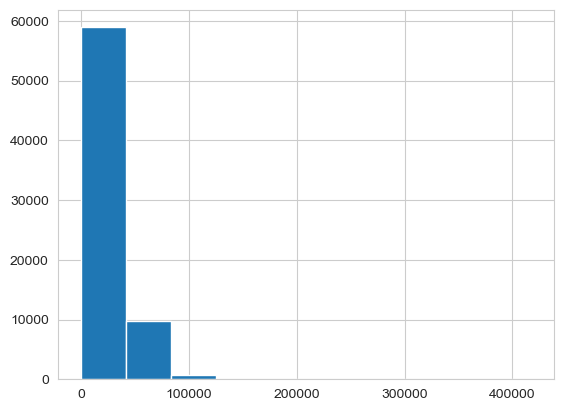

In [400]:
#plotting a histogram to see data visually
plt.hist(prev_data["AMT_ANNUITY"])
plt.show()

In [401]:
prev_data["AMT_ANNUITY"].median(skipna = True)

21368.25

In [402]:
#Imputing missing values
prev_data["AMT_ANNUITY"] = prev_data["AMT_ANNUITY"].fillna(prev_data["AMT_ANNUITY"].median(skipna = True))

In [403]:
prev_data["AMT_ANNUITY"].isnull().sum()

0

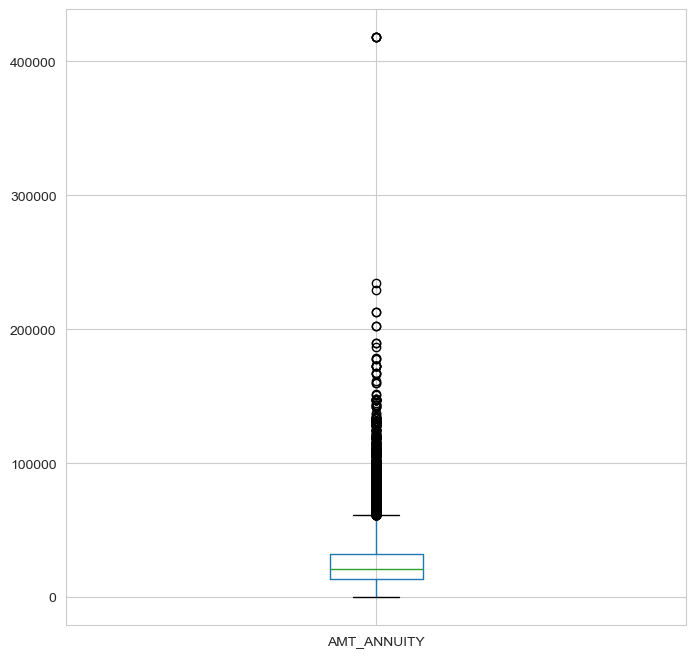

In [404]:
#Checking the spread of the data and also for outliers
prev_data.boxplot(["AMT_ANNUITY"], figsize=[8,8])
plt.show()

##### Data points seem to be scattered uniformly. Therefore, there is no need to remove/treat outliers

In [406]:
prev_data.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                    263
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION              0
dtype: int64

In [407]:
#Now analysing CNT_PAYMENT column
prev_data["CNT_PAYMENT"].isnull().sum()

263

In [408]:
prev_data["CNT_PAYMENT"].describe()

count   69372.00
mean       29.64
std        17.67
min         5.00
25%        12.00
50%        24.00
75%        48.00
max        60.00
Name: CNT_PAYMENT, dtype: float64

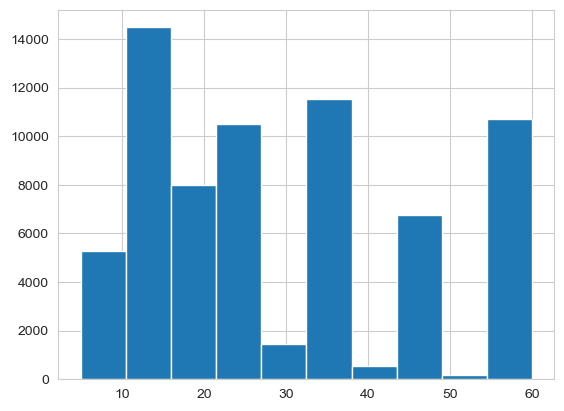

In [409]:
plt.hist(prev_data["CNT_PAYMENT"])
plt.show()

In [410]:
prev_data["CNT_PAYMENT"].mean()

29.640849334025255

In [411]:
#Imputing missing values
prev_data["CNT_PAYMENT"] = prev_data["CNT_PAYMENT"].fillna(prev_data["CNT_PAYMENT"].mean())

In [412]:
prev_data["CNT_PAYMENT"].describe()

count   69635.00
mean       29.64
std        17.63
min         5.00
25%        12.00
50%        24.00
75%        48.00
max        60.00
Name: CNT_PAYMENT, dtype: float64

In [413]:
#Now analysing AMT_GOODS_PRICE column
prev_data["AMT_GOODS_PRICE"].isnull().sum()

0

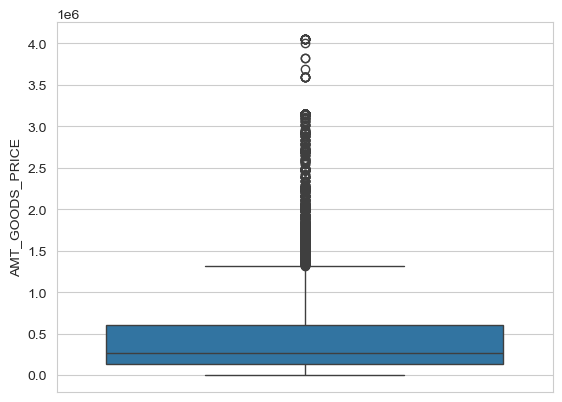

In [414]:
sns.boxplot(prev_data.AMT_GOODS_PRICE)
plt.show()

##### Data seems to be mostly continuous. So there is no requirement of treating outliers.

### Merging the two datasets, i.e. application_dataset and previous_application

In [417]:
print(app_data.columns)
print(prev_data.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BU

In [418]:
# Now merging the two datasets
loan_data = pd.merge(left = app_data, right = prev_data, how = 'inner', on = 'SK_ID_CURR')
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,0,90000.00,180000.00,9000.00,180000.00,Unaccompanied,Working,Higher education,Single / not married,With parents,0.03,-10341,-1010,-4799.00,-3015,1,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,-599.00,0,0,0,0,0,0,"75000,100000",150000-200000,1390369,Cash loans,22430.43,94500.00,109971.00,94500.00,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.00,high,Cash Street: high
1,100035,0,Cash loans,F,0,292500.00,665892.00,24592.50,477000.00,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.03,-15280,-2668,-5266.00,-3787,2,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,-1634.00,0,0,0,1,0,5,275000-300000,650000-700000,1344613,Cash loans,33238.80,1260000.00,1260000.00,1260000.00,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.00,low_action,Cash Street: low
2,100039,0,Cash loans,M,1,360000.00,733315.50,39069.00,679500.00,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02,-11694,-2060,-3557.00,-3557,3,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,2,0,2,0,-697.00,0,0,0,0,1,1,350000-375000,700000-750000,1077565,Cash loans,52513.51,1350000.00,1487214.00,1350000.00,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.00,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,0,180000.00,540000.00,27000.00,540000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.03,-16126,-1761,-8236.00,-4292,2,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,1,0,1,0,-540.00,0,0,0,1,0,1,175000-200000,500000-550000,1223113,Cash loans,28390.63,337500.00,407911.50,337500.00,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.00,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,0,180000.00,540000.00,27000.00,540000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.03,-16126,-1761,-8236.00,-4292,2,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,1,0,1,0,-540.00,0,0,0,1,0,1,175000-200000,500000-550000,1529558,Cash loans,29053.22,450000.00,555723.00,450000.00,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,low_normal,Cash Street: low


### Performing the Univariate analysis

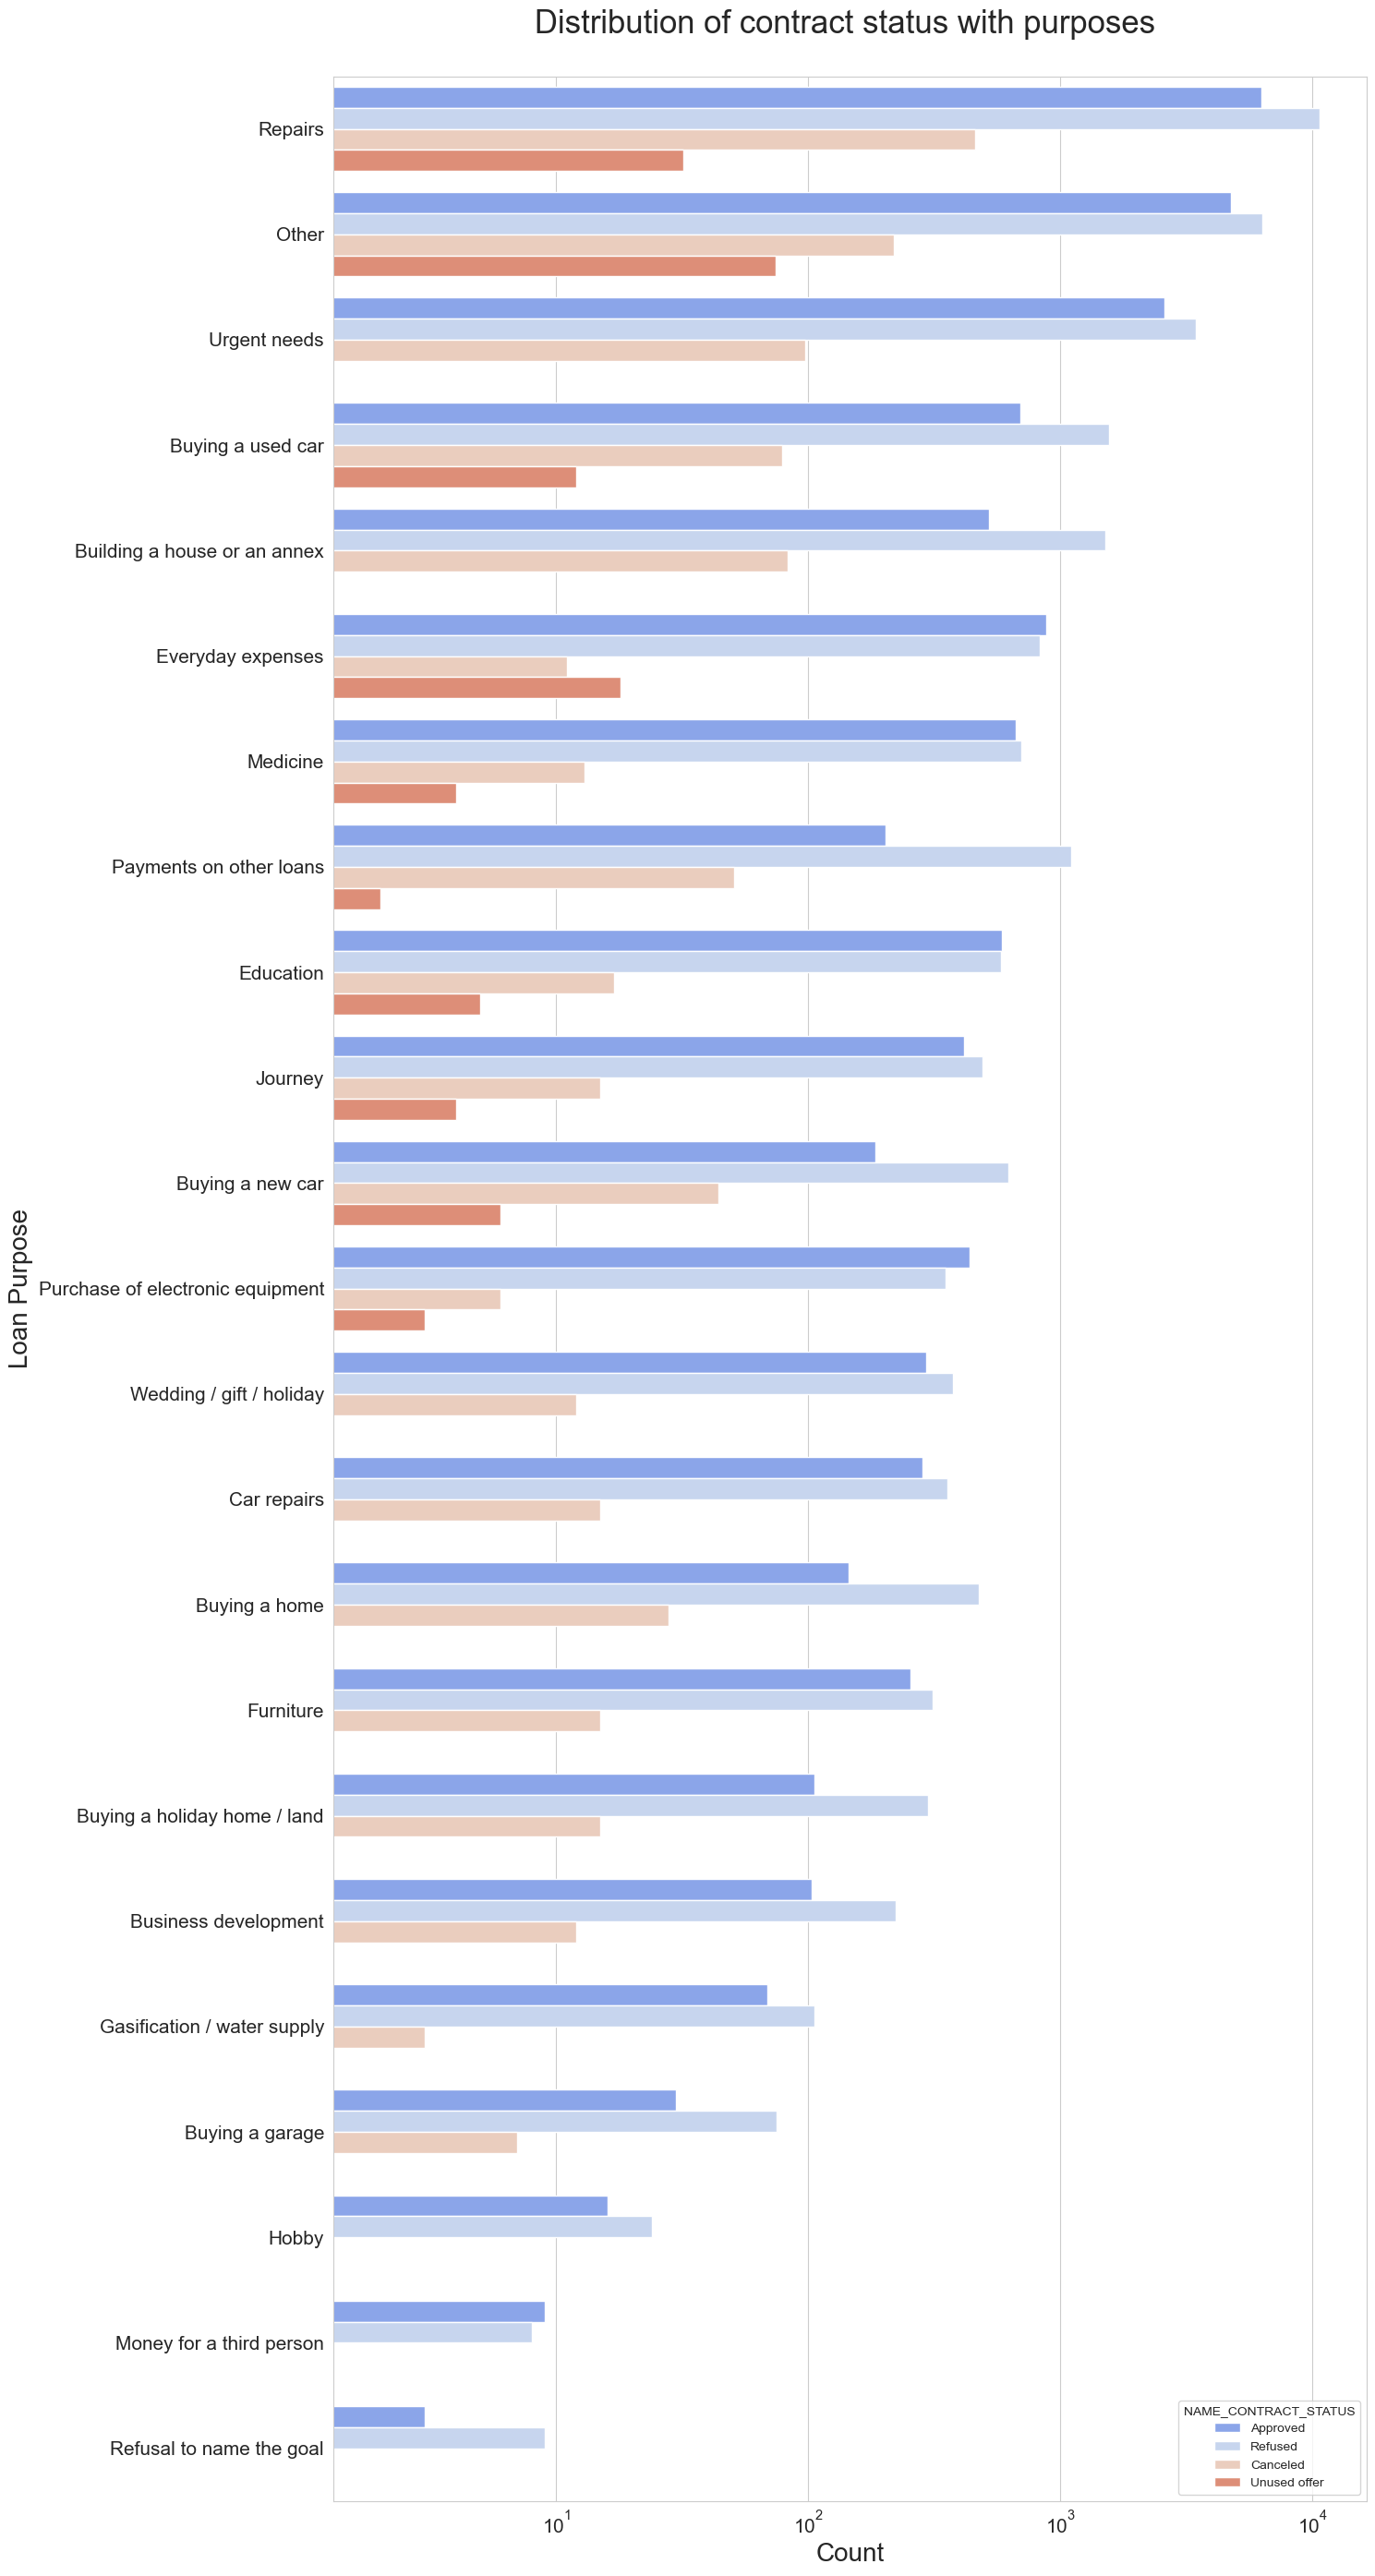

In [420]:
# Plotting for the Contract Status,
plt.figure(figsize=[15,28])
sns.countplot(data = loan_data, y= 'NAME_CASH_LOAN_PURPOSE', order=loan_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'NAME_CONTRACT_STATUS', palette='coolwarm')

plt.title('Distribution of contract status with purposes \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')
plt.tight_layout()
plt.savefig('plot21.png')
plt.show()

##### Conclusions from the graph:
Most rejection of loans came from purpose 'Repairs'.
For education purposes we have equal number of approves and rejection.
Paying other loans and buying a new car is having significant higher rejection than approves.

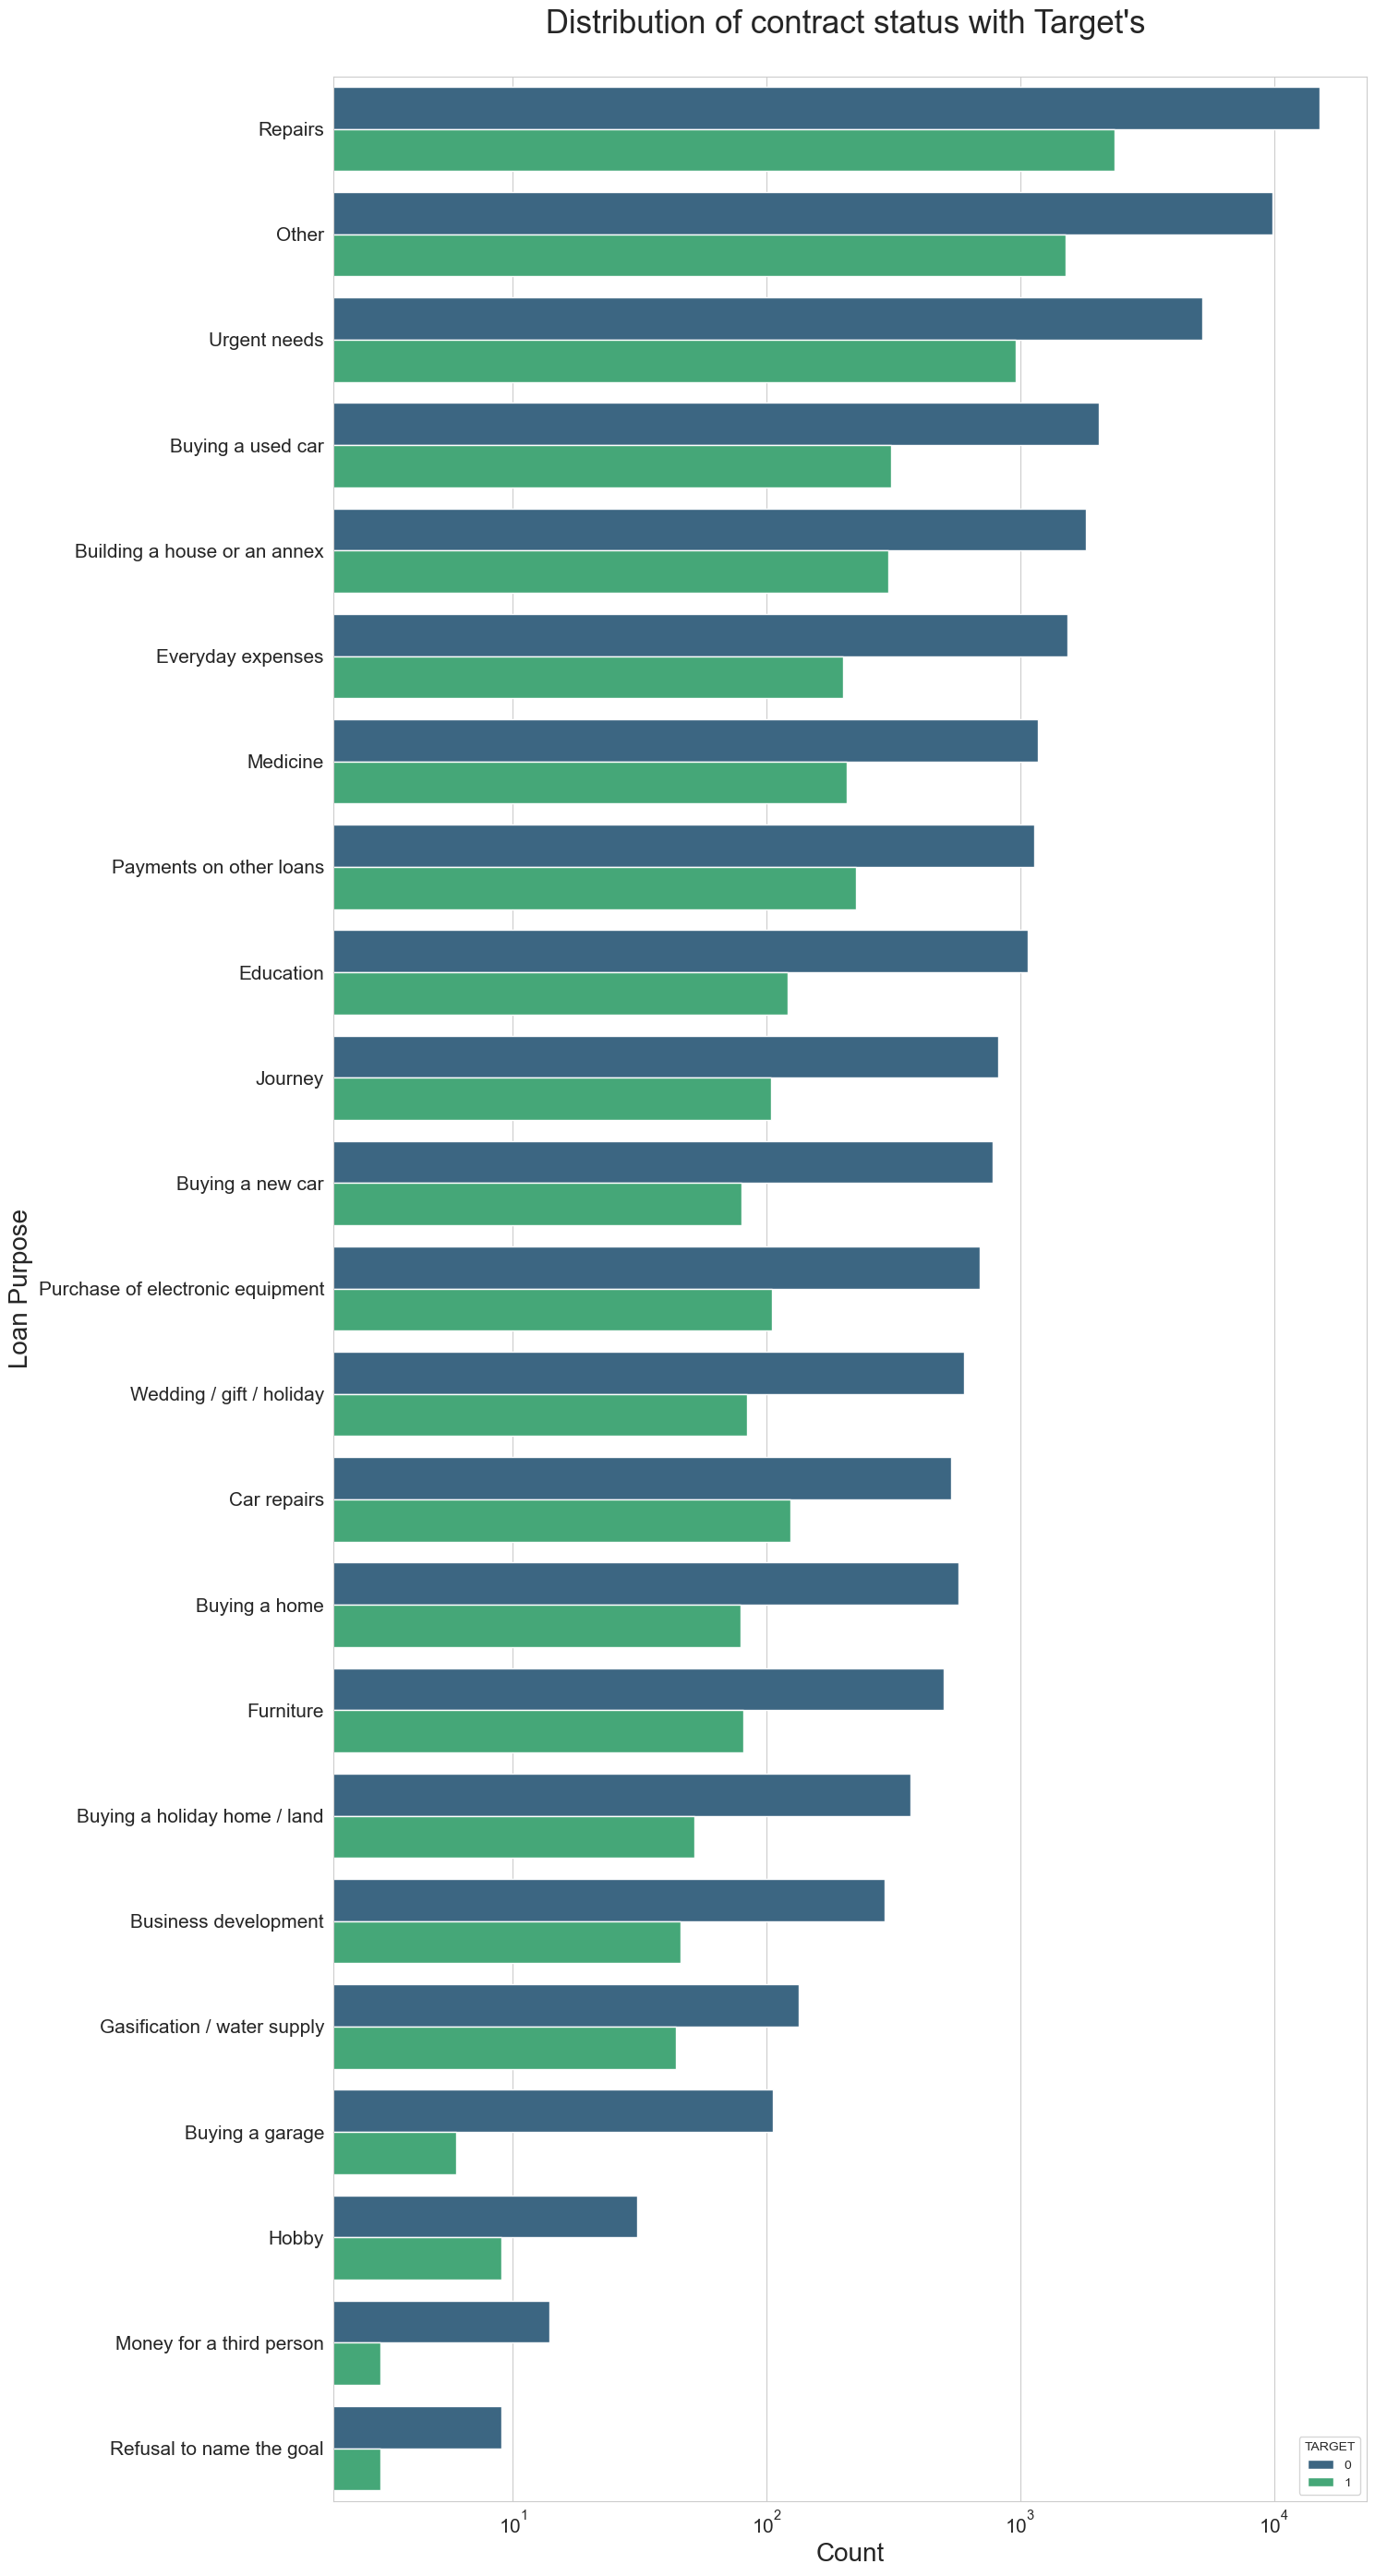

In [422]:
# Plotting for the Contract Status,
plt.figure(figsize=[15,28])

sns.countplot(data = loan_data, y= 'NAME_CASH_LOAN_PURPOSE', order=loan_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='viridis')

plt.title('Distribution of contract status with Target\'s \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')
plt.tight_layout()
plt.savefig('plot22.png')
plt.show()


##### Conclusion from the graph:
Loan purposes with 'Repairs' are facing more difficulites in payment on time.
There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

### Performing the bivariate analysis

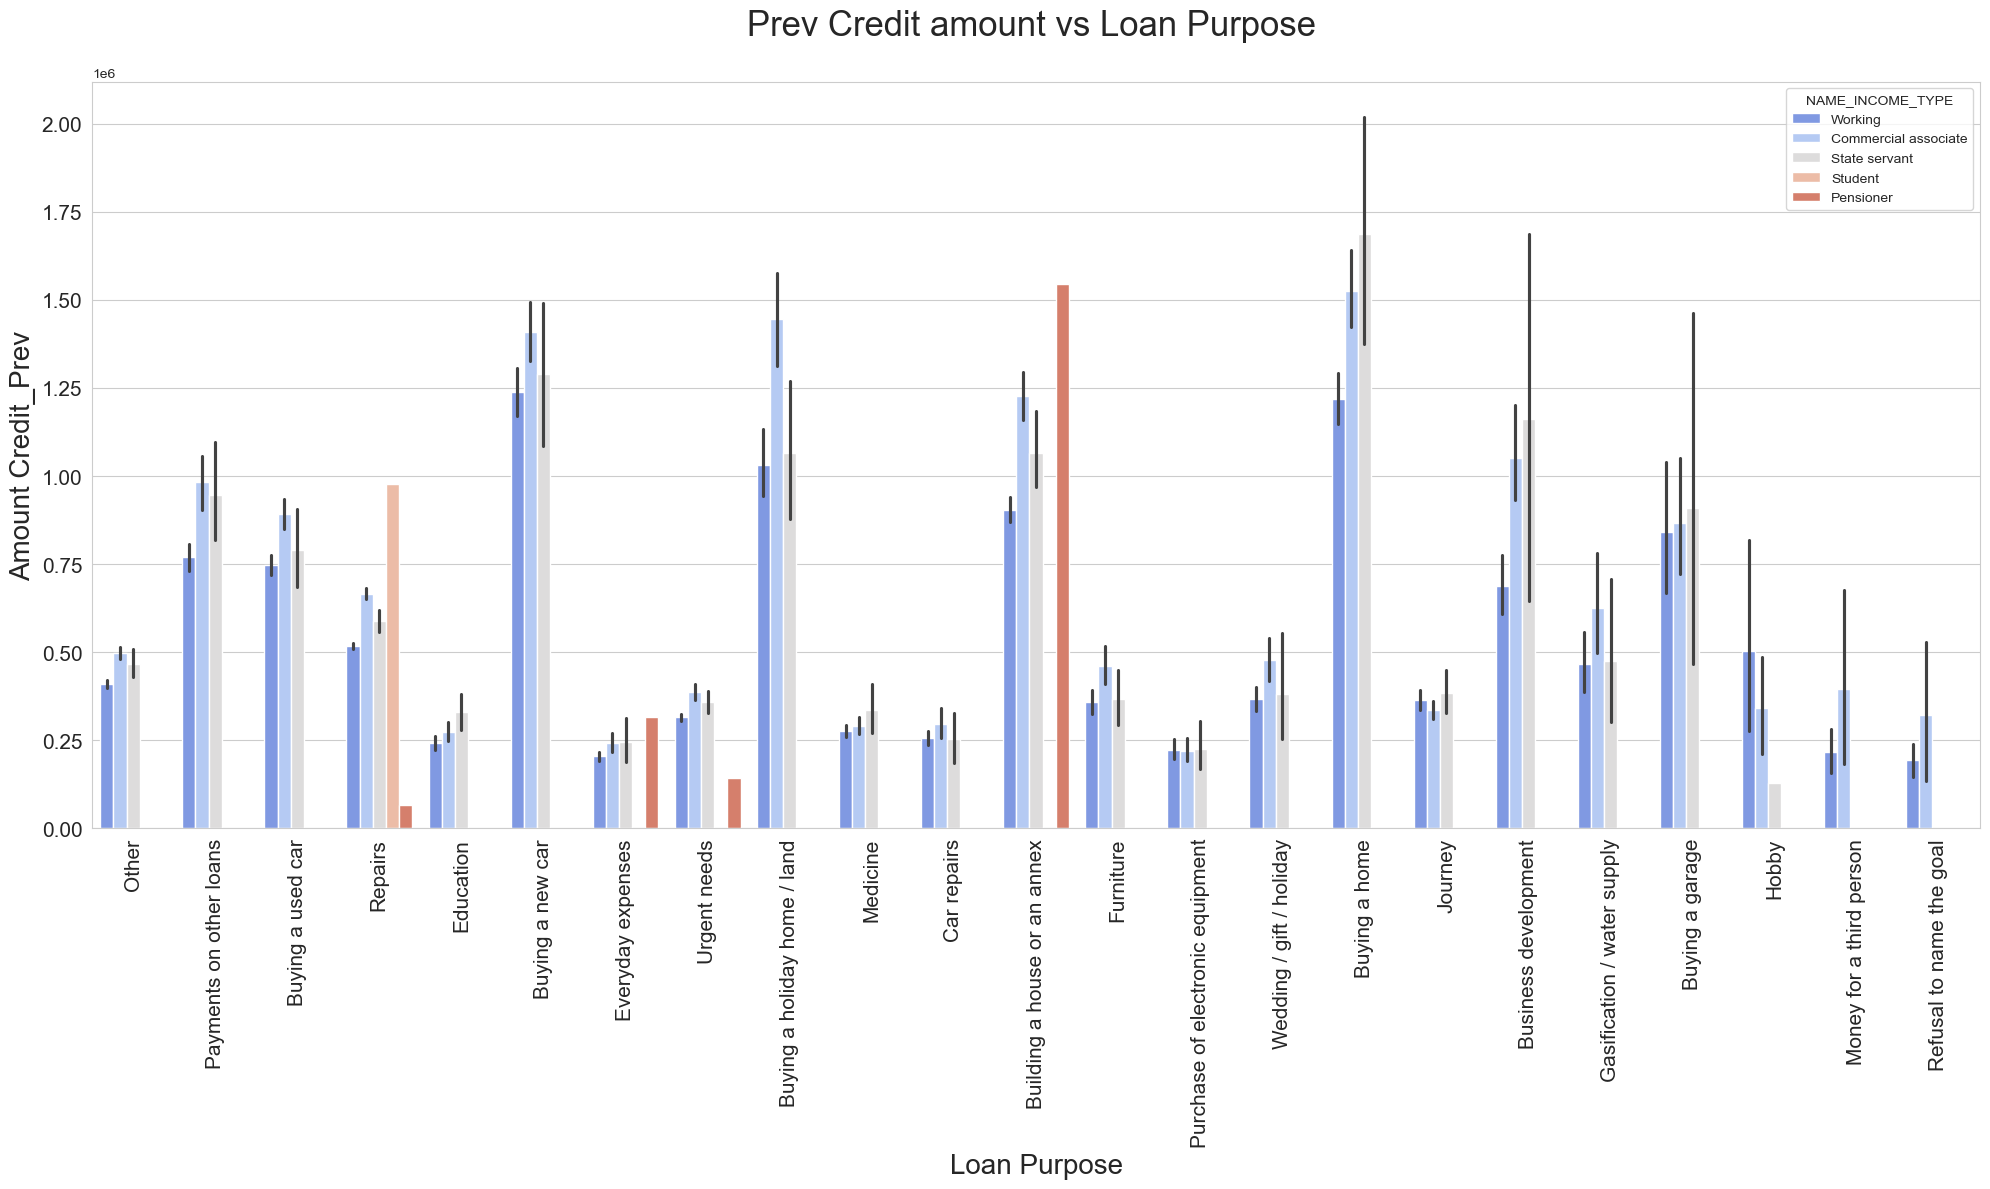

In [425]:
# Plotting for Credit amount in logarithmic scale

plt.figure(figsize=(20,12))

sns.barplot(data = loan_data, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_y', orient='v', palette='coolwarm')
plt.xticks(rotation=90)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Loan Purpose', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Prev Credit amount vs Loan Purpose \n', fontsize=25)
plt.tight_layout()
plt.savefig('plot23.png')
plt.show()


##### Conclusion from the graph:
The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
Income type of state servants have a significant amount of credit applied
Money for third person or a Hobby is having less credits applied for.

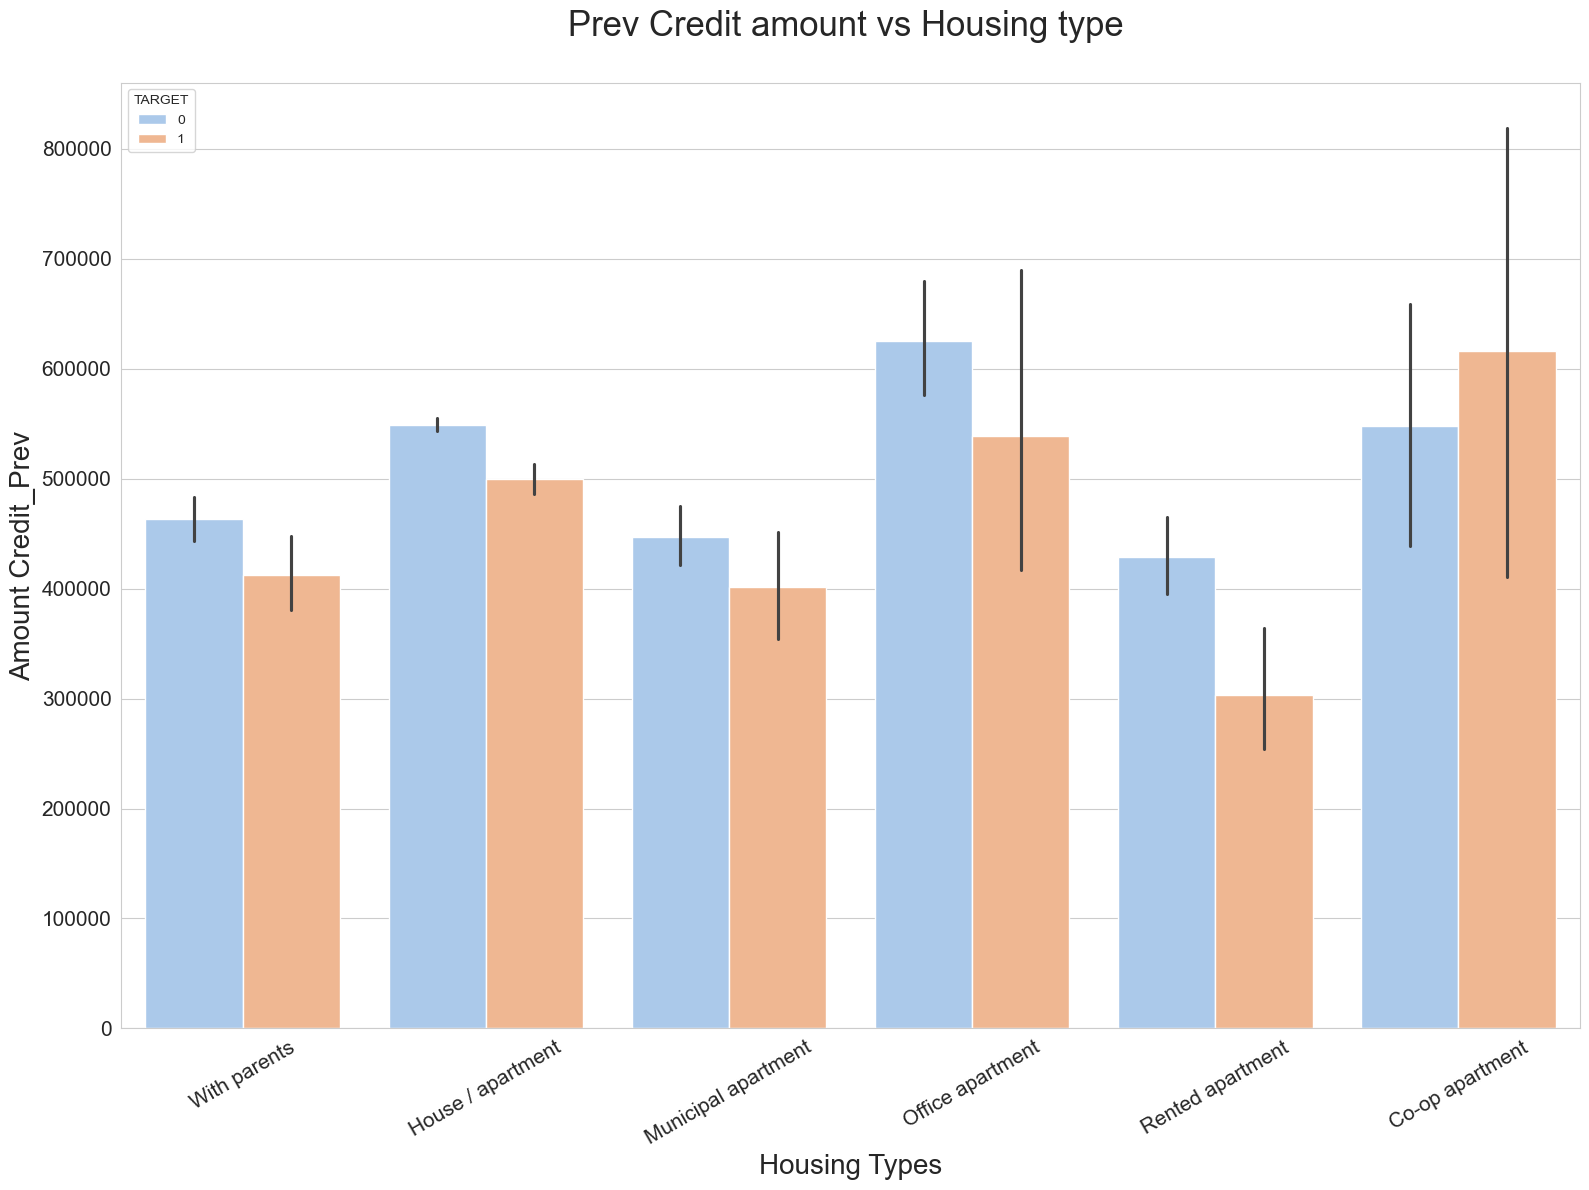

In [427]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =loan_data, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE', palette='pastel')
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('plot24.png')
plt.show()


##### Conclusions from the graph:
Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target=1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

### Correlation analysis of numerical variables

In [430]:
#Plotting correlation matrix
corr_df = loan_data[['AMT_ANNUITY_x', 'AMT_APPLICATION','AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
                    'AMT_ANNUITY_y', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'CNT_PAYMENT']].corr()

In [431]:
corr_df.head(8)

,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_ANNUITY_y,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_PAYMENT
AMT_ANNUITY_x,1.00,0.19,0.74,0.74,0.31,0.19,0.19,0.02
AMT_APPLICATION,0.19,1.00,0.22,0.24,0.78,0.99,1.00,0.66
AMT_CREDIT_x,0.74,0.22,1.00,0.98,0.25,0.22,0.22,0.10
AMT_GOODS_PRICE_x,0.74,0.24,0.98,1.00,0.26,0.23,0.24,0.10
AMT_ANNUITY_y,0.31,0.78,0.25,0.26,1.00,0.78,0.78,0.27
AMT_CREDIT_y,0.19,0.99,0.22,0.23,0.78,1.00,0.99,0.68
AMT_GOODS_PRICE_y,0.19,1.00,0.22,0.24,0.78,0.99,1.00,0.66
CNT_PAYMENT,0.02,0.66,0.10,0.10,0.27,0.68,0.66,1.00


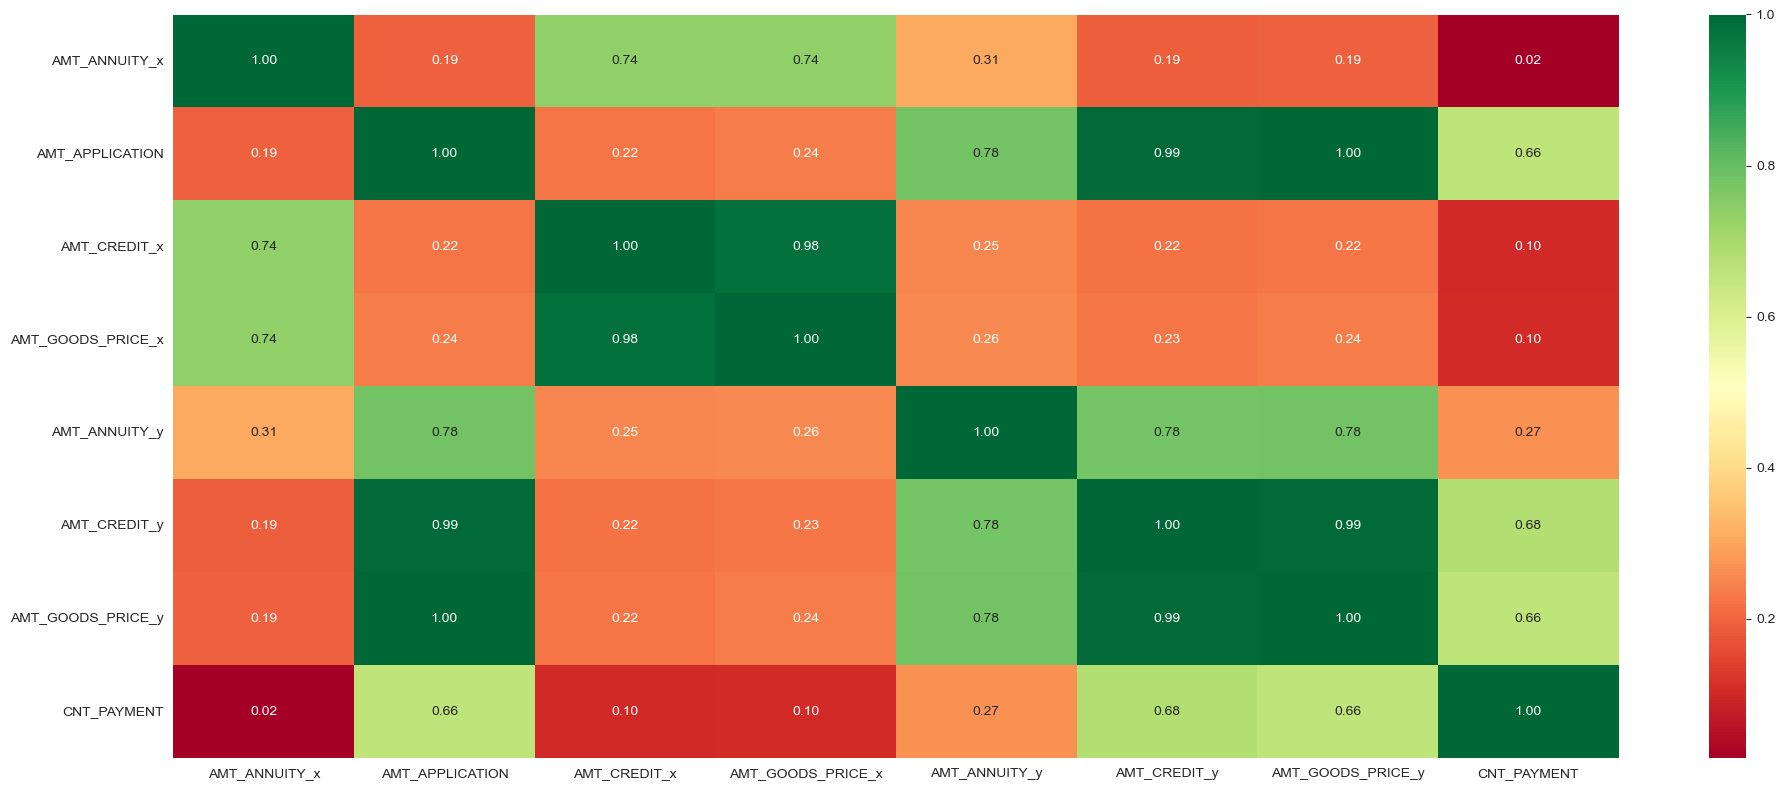

In [432]:
plt.figure(figsize = (20,8))
sns.heatmap(data = corr_df, annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.tight_layout()
plt.savefig('plot25.png')
plt.show()

#### END OF ANALYSIS